<a href="https://colab.research.google.com/github/shlomi1993/deep-learning-notebooks/blob/main/4_deciles_vs_percentiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Deciles vs. Percentiles

## Introduction

In this chapter, we define a `DataLoader` class designed for tabular datasets and use it to train several neural network models.

## Global Imports

In [ ]:
import torch
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

## Section A - Dataset Acquisition

We have been provided with a dataset in the form of a CSV file named `diabetes.csv`.

We load the dataset into a Pandas DataFrame `df` using the `read_csv` function, specifying the tab (`\t`) separator to ensure proper parsing.

In [ ]:
df = pd.read_csv('/content/diabetes.csv', sep='\t')  # Kindly update the path if needed

## Section B - Variable Meaning and Dataset Exploration

### Dataset overview and variable meaning

The dataset includes ten baseline variables for each of the 442 diabetes patients. These variables are: age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements. Additionally, the dataset contains a response variable of interest, which is a quantitative measure of disease progression one year after the baseline data collection.

**Data Set Characteristics:**

- **Number of Instances**: 442
- **Number of Attributes**: The first 10 columns consist of numeric predictive values.
- **Target**: The 11th column represents a quantitative measure of disease progression one year after the baseline.

**Attribute Information:**

1. `age`: Age in years
2. `sex`: Gender of the patient
3. `bmi`: Body mass index
4. `bp`: Average blood pressure
5. `s1`: Total serum cholesterol (tc)
6. `s2`: Low-density lipoproteins (ldl)
7. `s3`: High-density lipoproteins (hdl)
8. `s4`: Total cholesterol / HDL ratio (tch)
9. `s5`: Possibly log of serum triglycerides level (ltg)
10. `s6`: Blood sugar level (glu)

Note: All 10 feature variables have been mean-centered and scaled by the standard deviation times the square root of the number of samples (`n_samples`). In other words, the sum of squares for each column totals 1.

**Source URL:** [https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

### Dataset exploration

#### Display the first few rows of the dataset

In [ ]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


The dataset consists of 11 columns: 10 predictive features and 1 target variable. The features include age, sex, BMI, blood pressure, and various blood serum measurements such as total cholesterol, LDL, HDL, cholesterol/HDL ratio, triglycerides level, and blood sugar.

The target variable, labeled Y, represents disease progression one year after baseline. Each row corresponds to an individual patient, with data structured for analysis of how the features relate to disease progression. The feature variables is preprocessed, mean-centered, and scaled.

#### Display dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


The dataset consists of 442 entries and 11 columns, with no missing values. It includes 5 columns of type int64 (AGE, SEX, S1, S3, S6, and Y) and 6 columns of type float64 (BMI, BP, S2, S4, S5, and S6).

#### Get descriptive statistics for numerical columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


The `df.describe()` function provides a statistical summary of the dataset. Here are the key details:

- **AGE:** The age ranges from 19 to 79 years, with a mean of approximately 48.5 years. The standard deviation is about 13.1 years, indicating some variability in age.

- **SEX:** The values for sex are encoded as 1 and 2, with a mean of 1.47, suggesting a slight bias towards the sex labeled as 1.

- **BMI:** The body mass index (BMI) ranges from 18 to 42.2, with a mean of 26.4 and a standard deviation of 4.42, indicating a mix of normal and overweight individuals.

- **BP:** Average blood pressure values range from 62 to 133, with a mean of 94.65 and a standard deviation of 13.83.

- **S1:** Total serum cholesterol values range from 97 to 301, with a mean of 189.14 and a standard deviation of 34.61.

- **S2:** Low-density lipoproteins (LDL) range from 41.6 to 242.4, with a mean of 115.44 and a standard deviation of 30.41.

- **S3:** High-density lipoproteins (HDL) range from 22 to 99, with a mean of 49.79 and a standard deviation of 12.93.

- **S4:** The total cholesterol/HDL ratio ranges from 2 to 9.09, with a mean of 4.07 and a standard deviation of 1.29.

- **S5:** The log of serum triglycerides levels ranges from 3.26 to 6.11, with a mean of 4.64 and a standard deviation of 0.52.

- **S6:** Blood sugar levels range from 58 to 124, with a mean of 91.26 and a standard deviation of 11.50.

- **Y:** Disease progression values range from 25 to 346, with a mean of 152.13 and a standard deviation of 77.09.

## Section C - Deciles Calculation

#### Calculate deciles

Extract the target variable Y

In [ ]:
y = df['Y']

Use the `quantile` method of the Pandas DataFrame to calculate each decile as a tuple of lower and upper bound values.

In [ ]:
deciles = {k: (float(y.quantile((k - 1) / 10)), float(y.quantile(k / 10))) for k in range(1, 11)}

Verify 10 deciles

In [ ]:
assert len(deciles) == 10, f"Expected 10 deciles, got {len(deciles)}"
print("✅ Passed!")

✅ Passed!


Display the decile values

In [ ]:
suffixes = {1: 'st', 2: 'nd', 3: 'rd'}
for k, (lower_bound, upper_bound) in tqdm(deciles.items(), desc="Deciles"):
    suffix = suffixes.get(k % 10, 'th')
    print(f"{k}{suffix} decile:\t({lower_bound:.2f}, {upper_bound:.2f})")

Deciles:   0%|          | 0/10 [00:00<?, ?it/s]

1st decile:	(25.00, 60.00)
2nd decile:	(60.00, 77.00)
3rd decile:	(77.00, 94.00)
4th decile:	(94.00, 115.00)
5th decile:	(115.00, 140.50)
6th decile:	(140.50, 168.00)
7th decile:	(168.00, 196.70)
8th decile:	(196.70, 232.00)
9th decile:	(232.00, 265.00)
10th decile:	(265.00, 346.00)


#### Test deciles

The third decile should be the range of numbers such that the Y values of 10% of the samples fall within it. Below the lower limit of the range, there are another 20% of the samples, and above its upper limit, there are another 70% of the samples.

In [ ]:
lower_bound, upper_bound = deciles[3]  # 3rd decile lower and upper bounds
lower_bound, upper_bound

(77.0, 94.0)

10% of the samples should fall within the 3rd decile

In [ ]:
decile_range = y[(lower_bound <= y) & (y < upper_bound)]
assert round(0.1 * len(y)) == len(decile_range), f"Expected {0.1 * len(y)} in the 3rd decile, got {len(decile_range)}"
print("✅ Passed!")

✅ Passed!


20% of the samples should fall below the lower bound of the 3rd decile

In [ ]:
below_range = y[y < lower_bound]
assert round(0.2 * len(y)) - len(below_range), f"Expected {0.2 * len(y)} below the 3rd decile, got {len(below_range)}"
print("✅ Passed!")

✅ Passed!


70% of the samples should fall above the upper bound of the 3rd decile

In [ ]:
above_range = y[y >= upper_bound]
assert round(0.7 * len(y)) - len(above_range), f"Test failed! Expected {0.7 * len(y)} above the 3rd decile, got {len(above_range)}"
print("✅ Passed!")

✅ Passed!


## Section D - Decile Class

#### Use pandas `qcut` function to add decile class for each sample

In [ ]:
df['Class'] = pd.qcut(df['Y'], q=10, labels=False) + 1  # The +1 is needed to shift the class from 0-based index to 1-based
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,Class
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,6
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,2
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,6
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,8
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,5


#### Class variable sanity test

In [ ]:
# Store the first sample Y value
first_sample_Y_value = float(df.head(1)['Y'].iloc[0])

# Find the decile class of the first sample
first_sample_exptected_decile_class = 10  # default to the highest decile
for k, (lower, upper) in tqdm(deciles.items(), desc="Find Class"):
    if lower <= first_sample_Y_value < upper:
        first_sample_exptected_decile_class = k
        break  # stop at the first match

# Show expected decile class
first_sample_exptected_decile_class

Find Class:   0%|          | 0/10 [00:00<?, ?it/s]

6

In [ ]:
first_sample_actual_decile_class = int(df.head(1)['Class'].iloc[0])
assert first_sample_actual_decile_class == first_sample_exptected_decile_class, f"Expected decile class {first_sample_exptected_decile_class}, got {first_sample_actual_decile_class}"
print("✅ Passed!")

✅ Passed!


## Section E - Dataset Wrapper

#### Dataset wrapper class definition

The following `DiabetesDataset` class wraps a Pandas `DataFrame` containing diabetes-related data and converts it into a format compatible with PyTorch's `Dataset` interface. It drops the `Y` column (assumed to be a continuous value), uses `'Class'` as the classification label, and transforms the remaining features into a float tensor. This class is designed for training classifiers using `torch.utils.data.DataLoader`, enabling easy batching, shuffling, and parallel data loading during training or evaluation.

In [ ]:
from torch.utils.data import Dataset

class DiabetesDataset(Dataset):
    """
    A PyTorch Dataset for handling structured tabular data for the diabetes classification task.

    This dataset assumes the input DataFrame contains a 'Class' column representing the target labels, and the remaining
    columns as features.

    Attributes:
        X (torch.Tensor): The input features as a float32 tensor.
        y (torch.Tensor): The class labels as an int64 tensor.
    """
    def __init__(self, dataframe: pd.DataFrame) -> None:
        self.X = torch.tensor(dataframe.drop(columns=['Class']).values, dtype=torch.float32)
        self.y = torch.tensor(dataframe['Class'].values, dtype=torch.int64)

    def __len__(self) -> int:
        return len(self.y)

    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor]:
        return self.X[idx], self.y[idx]

#### Wrapper class usage

Perform a train-test split, keeping the samples for testing

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Instantiate train and test `DiabetesDataset` objects

In [ ]:
train_set = DiabetesDataset(train_df)
test_set = DiabetesDataset(test_df)

Access dataset size

In [ ]:
len(train_set), len(test_set)

(353, 89)

In [ ]:
len(train_set) + len(test_set)

442

Check a sample

In [ ]:
sample_x, sample_y = train_set[42]
print(f"sample_x: {sample_x}")
print(f"sample_y: {sample_y}")

sample_x: tensor([ 53.0000,   1.0000,  22.2000,  78.0000, 164.0000,  81.0000,  70.0000,
          2.0000,   4.1744, 101.0000,  93.0000])
sample_y: 3


## Section F - DataLoader with Mini-Batches

Create a PyTorch `DataLoader` object to load the dataset in mini-batches of size 10.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_set, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=10, shuffle=True)

Using `shuffle=True` is a good practice for avoiding overfitting and enhancing generalization.

## Section G - Single Batch Printing

Sample a single batch from the dataset

In [ ]:
batch_x, batch_y = next(iter(train_dataloader))

Print the batch

In [ ]:
print(f"batch_x: {batch_x}")
print(f"batch_y: {batch_y}")

batch_x: tensor([[ 39.0000,   1.0000,  22.9000,  77.0000, 204.0000, 143.2000,  46.0000,
           4.0000,   4.3041,  74.0000, 128.0000],
        [ 57.0000,   1.0000,  24.5000,  93.0000, 186.0000,  96.6000,  71.0000,
           3.0000,   4.5218,  91.0000, 148.0000],
        [ 50.0000,   1.0000,  31.0000, 123.0000, 178.0000, 105.0000,  48.0000,
           4.0000,   4.8283,  88.0000, 280.0000],
        [ 71.0000,   2.0000,  26.1000,  85.0000, 220.0000, 152.4000,  47.0000,
           5.0000,   4.6347,  91.0000, 139.0000],
        [ 42.0000,   1.0000,  30.6000, 121.0000, 176.0000,  92.8000,  69.0000,
           3.0000,   4.2627,  89.0000, 175.0000],
        [ 21.0000,   1.0000,  20.1000,  63.0000, 135.0000,  69.0000,  54.0000,
           3.0000,   4.0943,  89.0000,  55.0000],
        [ 53.0000,   1.0000,  22.2000,  78.0000, 164.0000,  81.0000,  70.0000,
           2.0000,   4.1744, 101.0000,  93.0000],
        [ 41.0000,   1.0000,  33.8000, 123.3300, 187.0000, 127.0000,  45.0000,
         

Print the shapes of `batch_x` and `batch_y`

In [ ]:
print(f"batch_x.shape: {tuple(batch_x.shape)}")
print(f"batch_y.shape: {tuple(batch_y.shape)}")

batch_x.shape: (10, 11)
batch_y.shape: (10,)


## Section H - Customized DataLoader Usage

#### Define a Simple Deep Neural Network

To train a Deep Neural Network using the customized `DataLoader` to predict the 'Class' based on the rest of the variables (features), we'll build a simple neural network using PyTorch.

##### Define History Class

First, we define a `History` class that records loss and accuracy values, and provides a method to plot these metrics nicely side by side.

In [ ]:
class History:
    """
    Tracks training loss and accuracy across epochs and provides a method to visualize them.

    Attributes:
        losses (list): A list to store the loss value for each epoch.
        accuracies (list): A list to store the accuracy value for each epoch.
    """
    def __init__(self) -> None:
        self.losses: list[float] = []
        self.accuracies: list[float] = []

    def plot(self) -> None:
        """
        Plots the loss and accuracy history side by side.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Plot loss
        ax1.plot(self.losses, color='orange')
        ax1.set_title("Loss per Epoch")
        ax1.set_xlabel("Epoch")
        ax1.set_ylabel("Loss")

        # Plot accuracy
        ax2.plot(self.accuracies, color='green')
        ax2.set_title("Accuracy per Epoch")
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Accuracy")

        plt.tight_layout()
        plt.show()

##### Define SimpleNet Neural Network Class

Then, we define the following simple deep neural network class.

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    """
    A simple feedforward neural network with two hidden layers and ReLU activation.

    Args:
        input_size (int): Number of input features.
        hidden_size (int): Number of neurons in each hidden layer.
        output_size (int): Number of output classes.
    """
    def __init__(self, input_size: int, hidden_size: int, output_size: int) -> None:
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.loss_func = nn.CrossEntropyLoss()  # Use the cross-entropy loss function as it suitable for classification.

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Defines the forward pass of the network.

        Args:
            x (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: Output tensor.
        """
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def fit(self, dataloader: DataLoader, optimizer: optim.Optimizer, n_epochs: int = 100,
            log_interval: int = 10) -> History:
        """
        Trains the model for `n_epochs` number of epochs using the provided data loader and optimizer.

        Args:
            dataloader (DataLoader): DataLoader that provides training data in batches.
            optimizer (Optimizer): Optimizer used to update the model parameters.
            n_epochs (int, optional): Number of training epochs. Defaults to 100.
            log_interval (int, optional): Frequency (in epochs) to print training progress. Defaults to 10.

        Returns:
            History: Object that stores the loss and accuracy history over the training epochs.
        """

        history = History()
        for epoch in tqdm(range(1, n_epochs + 1), desc="Epochs"):
            self.train()
            running_loss = 0.0
            correct_predictions = 0
            total_samples = 0

            for batch_x, batch_y in dataloader:
                optimizer.zero_grad()
                outputs = self(batch_x)
                calculated_loss = self.loss_func(outputs, batch_y - 1)  # Adjust for 0-based indexing
                calculated_loss.backward()
                optimizer.step()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                correct_predictions += (predicted == (batch_y - 1)).sum().item()
                total_samples += batch_y.size(0)
                running_loss += calculated_loss.item()

            accuracy = 100 * correct_predictions / total_samples
            history.losses.append(running_loss / len(dataloader))
            history.accuracies.append(accuracy)

            if epoch % log_interval == 0 or epoch == 1:
                print(f"Epoch {epoch}/{n_epochs}, Loss: {running_loss / len(dataloader):.4f}, Accuracy: {accuracy:.2f}%")

        return history

    def predict(self, dataloader: DataLoader) -> tuple[torch.Tensor, torch.Tensor]:
        """
        Performs prediction on data from the given DataLoader.

        Args:
            dataloader (DataLoader): DataLoader containing the input data.

        Returns:
            tuple[torch.Tensor, torch.Tensor]: Tuple of (predicted_labels, true_labels)
        """
        self.eval()
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                outputs = self(batch_x)
                _, predicted = torch.max(outputs, 1)
                all_preds.append(predicted)
                all_targets.append(batch_y - 1)  # Adjust for 0-based indexing

        return torch.cat(all_preds), torch.cat(all_targets)

The `SimpleNet` class defines a Feed-Forward neural network with three fully connected layers. The first layer (`fc1`) transforms the input of size `input_size` into a hidden representation of size `hidden_size`, while the second layer (`fc2`) processes this hidden representation and outputs another hidden state of the same size. The final layer (`fc3`) produces the output of size `output_size`. Between the first two layers, the ReLU activation function (relu) is applied to introduce non-linearity. In the forward method, the input is passed sequentially through `fc1`, followed by ReLU, then through `fc2` with another ReLU, and finally through `fc3` to generate the output.

#### Define Layer Sizes

We will use input size equal to the number of inputs (10, or later 11), 64 units in the hidden layers, and output size equal to the number of deciles (also 10).

In [ ]:
input_size = train_df.drop(columns=['Class']).shape[1]  # Number of features (11)
hidden_size = 64  # Tried 32, 64, 128. 64 appears to be sufficient.
output_size = len(deciles)

#### Hyperparameter Tuning

Next, we perform hyperparameter calibration to evaluate the impact of different learning rates on model performance across epochs. We define a set of candidate learning rates (`lrs`) and train an instance of the `SimpleNet` model for each one using a relatively large number of training epochs (`n_epochs=100`). For each learning rate, we initialize a new model and optimizer, then train the model using the fit method, which returns a `History` object that records loss and accuracy over time. These metrics are stored in dicts for comparison.

In [ ]:
# lrs = [0.0001, 0.001, 0.01, 0.1]
# all_losses = dict()
# all_accuracies = dict()

# for lr in tqdm(lrs, "Hyperparameter Calibration"):
#     intermediate_model = SimpleNet(input_size, hidden_size, output_size)  # Re-initialize model for each run
#     intermediate_optimizer = optim.Adam(intermediate_model.parameters(), lr=lr)
#     intermediate_history = intermediate_model.fit(train_dataloader, intermediate_optimizer, n_epochs=1000, log_interval=50)
#     all_losses[lr] = intermediate_history.losses
#     all_accuracies[lr] = intermediate_history.accuracies

Hyperparameter Calibration:   0%|          | 0/4 [00:00<?, ?it/s]

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 8.9548, Accuracy: 12.18%
Epoch 50/1000, Loss: 0.9890, Accuracy: 58.07%
Epoch 100/1000, Loss: 0.7944, Accuracy: 66.01%
Epoch 150/1000, Loss: 0.7064, Accuracy: 70.25%
Epoch 200/1000, Loss: 0.6657, Accuracy: 72.80%
Epoch 250/1000, Loss: 0.5772, Accuracy: 75.64%
Epoch 300/1000, Loss: 0.5480, Accuracy: 77.05%
Epoch 350/1000, Loss: 0.5338, Accuracy: 75.92%
Epoch 400/1000, Loss: 0.5034, Accuracy: 80.17%
Epoch 450/1000, Loss: 0.4847, Accuracy: 79.04%
Epoch 500/1000, Loss: 0.4488, Accuracy: 82.72%
Epoch 550/1000, Loss: 0.4161, Accuracy: 83.85%
Epoch 600/1000, Loss: 0.4040, Accuracy: 84.14%
Epoch 650/1000, Loss: 0.4022, Accuracy: 83.00%
Epoch 700/1000, Loss: 0.3897, Accuracy: 86.12%
Epoch 750/1000, Loss: 0.3500, Accuracy: 86.69%
Epoch 800/1000, Loss: 0.3415, Accuracy: 87.82%
Epoch 850/1000, Loss: 0.3156, Accuracy: 88.10%
Epoch 900/1000, Loss: 0.3182, Accuracy: 89.24%
Epoch 950/1000, Loss: 0.2977, Accuracy: 89.52%
Epoch 1000/1000, Loss: 0.2714, Accuracy: 88.95%


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 4.6018, Accuracy: 22.38%
Epoch 50/1000, Loss: 0.6963, Accuracy: 66.86%
Epoch 100/1000, Loss: 0.4874, Accuracy: 79.04%
Epoch 150/1000, Loss: 0.3866, Accuracy: 82.15%
Epoch 200/1000, Loss: 0.2870, Accuracy: 89.52%
Epoch 250/1000, Loss: 0.1566, Accuracy: 95.18%
Epoch 300/1000, Loss: 0.0785, Accuracy: 98.58%
Epoch 350/1000, Loss: 0.1610, Accuracy: 93.77%
Epoch 400/1000, Loss: 0.0412, Accuracy: 99.15%
Epoch 450/1000, Loss: 0.0185, Accuracy: 99.72%
Epoch 500/1000, Loss: 0.0194, Accuracy: 99.72%
Epoch 550/1000, Loss: 0.0190, Accuracy: 99.43%
Epoch 600/1000, Loss: 0.0111, Accuracy: 99.72%
Epoch 650/1000, Loss: 0.0770, Accuracy: 97.45%
Epoch 700/1000, Loss: 0.1647, Accuracy: 95.18%
Epoch 750/1000, Loss: 0.0150, Accuracy: 99.72%
Epoch 800/1000, Loss: 0.0172, Accuracy: 99.43%
Epoch 850/1000, Loss: 0.1739, Accuracy: 93.48%
Epoch 900/1000, Loss: 0.0548, Accuracy: 98.02%
Epoch 950/1000, Loss: 0.0817, Accuracy: 96.60%
Epoch 1000/1000, Loss: 0.0201, Accuracy: 99.15%


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 5.3344, Accuracy: 19.55%
Epoch 50/1000, Loss: 0.8873, Accuracy: 58.92%
Epoch 100/1000, Loss: 0.7425, Accuracy: 64.31%
Epoch 150/1000, Loss: 0.6906, Accuracy: 67.71%
Epoch 200/1000, Loss: 0.5679, Accuracy: 73.94%
Epoch 250/1000, Loss: 0.5146, Accuracy: 80.45%
Epoch 300/1000, Loss: 0.5305, Accuracy: 78.47%
Epoch 350/1000, Loss: 0.5106, Accuracy: 77.05%
Epoch 400/1000, Loss: 0.6642, Accuracy: 74.79%
Epoch 450/1000, Loss: 0.4352, Accuracy: 82.72%
Epoch 500/1000, Loss: 0.4642, Accuracy: 78.47%
Epoch 550/1000, Loss: 0.4679, Accuracy: 81.30%
Epoch 600/1000, Loss: 0.4156, Accuracy: 83.00%
Epoch 650/1000, Loss: 0.5979, Accuracy: 73.37%
Epoch 700/1000, Loss: 0.4112, Accuracy: 83.85%
Epoch 750/1000, Loss: 0.4006, Accuracy: 81.87%
Epoch 800/1000, Loss: 0.3898, Accuracy: 83.29%
Epoch 850/1000, Loss: 0.6826, Accuracy: 69.12%
Epoch 900/1000, Loss: 0.3622, Accuracy: 85.84%
Epoch 950/1000, Loss: 0.4350, Accuracy: 84.14%
Epoch 1000/1000, Loss: 0.4306, Accuracy: 79.60%


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 13.9195, Accuracy: 9.07%
Epoch 50/1000, Loss: 2.3270, Accuracy: 8.50%
Epoch 100/1000, Loss: 2.3275, Accuracy: 6.52%
Epoch 150/1000, Loss: 2.3332, Accuracy: 9.07%
Epoch 200/1000, Loss: 2.3251, Accuracy: 8.22%
Epoch 250/1000, Loss: 2.3307, Accuracy: 8.50%
Epoch 300/1000, Loss: 2.3410, Accuracy: 7.93%
Epoch 350/1000, Loss: 2.3335, Accuracy: 8.22%
Epoch 400/1000, Loss: 2.3290, Accuracy: 9.35%
Epoch 450/1000, Loss: 2.3241, Accuracy: 7.08%
Epoch 500/1000, Loss: 2.3244, Accuracy: 8.50%
Epoch 550/1000, Loss: 2.3301, Accuracy: 5.95%
Epoch 600/1000, Loss: 2.3315, Accuracy: 7.08%
Epoch 650/1000, Loss: 2.3289, Accuracy: 9.07%
Epoch 700/1000, Loss: 2.3266, Accuracy: 9.63%
Epoch 750/1000, Loss: 2.3271, Accuracy: 10.20%
Epoch 800/1000, Loss: 2.3221, Accuracy: 9.35%
Epoch 850/1000, Loss: 2.3324, Accuracy: 10.48%
Epoch 900/1000, Loss: 2.3279, Accuracy: 8.78%
Epoch 950/1000, Loss: 2.3343, Accuracy: 7.08%
Epoch 1000/1000, Loss: 2.3267, Accuracy: 5.95%


The stored loss and accuracy dicts can now be used to visualize the results by plotting the loss and accuracy curves, with each line representing a different learning rate.

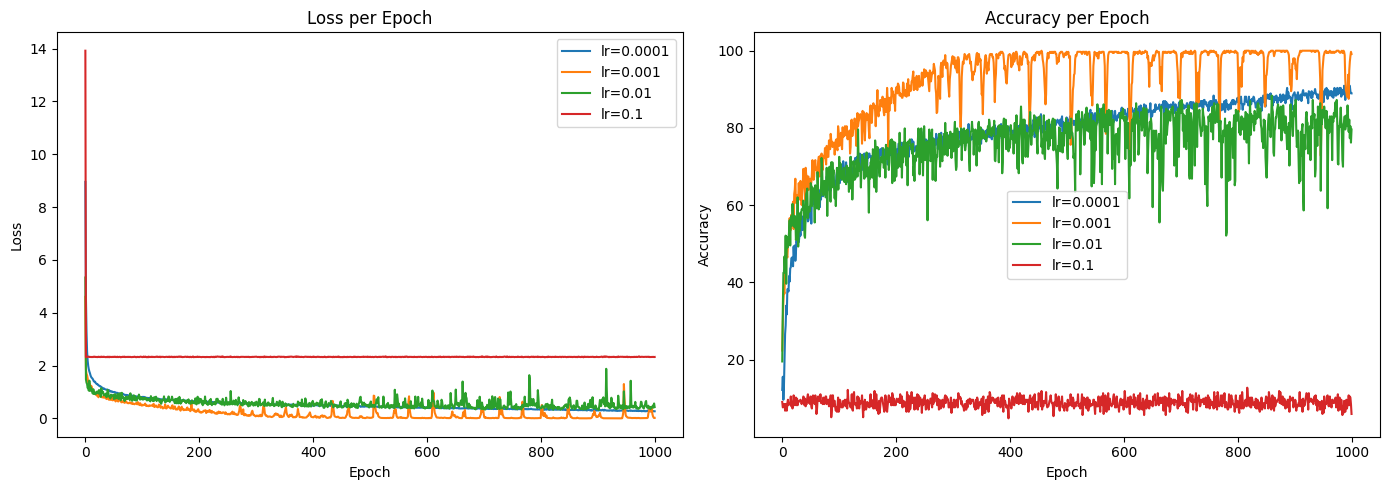

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# # Left: Loss plot
# for lr in lrs:
#     ax1.plot(all_losses[lr], label=f"lr={lr}")
# ax1.set_title("Loss per Epoch")
# ax1.set_xlabel("Epoch")
# ax1.set_ylabel("Loss")
# ax1.legend()

# # Right: Accuracy plot
# for lr in lrs:
#     ax2.plot(all_accuracies[lr], label=f"lr={lr}")
# ax2.set_title("Accuracy per Epoch")
# ax2.set_xlabel("Epoch")
# ax2.set_ylabel("Accuracy")
# ax2.legend()

# plt.tight_layout()
# plt.show()

This side-by-side comparison shows that a **learning rate of 0.001** produces the best loss and accuracy values throughout training. With this learning rate, 300–500 epochs appear sufficient, so we choose **400 epochs** as a balanced value. Beyond 600 epochs, the model either starts to diverge (for a learning rate of 0.01) or begins to overfit (for 0.001). A learning rate of 0.1 consistently fails to approach the optimal point, while 0.0001 shows slow but steady improvement, although not as effective as 0.001.

In [ ]:
learning_rate = 0.001
n_epochs = 400

#### Train Model

Instantiate a model and state-of-the-art Adam optimizer with the selected larning rate `lr`.

In [ ]:
model1 = SimpleNet(input_size, hidden_size, output_size)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)

In [ ]:
history1 = model1.fit(train_dataloader, optimizer1, n_epochs=n_epochs)

Epochs:   0%|          | 0/400 [00:00<?, ?it/s]

Epoch 1/400, Loss: 4.8092, Accuracy: 17.28%
Epoch 10/400, Loss: 1.3346, Accuracy: 46.18%
Epoch 20/400, Loss: 0.9595, Accuracy: 56.66%
Epoch 30/400, Loss: 0.8711, Accuracy: 60.91%
Epoch 40/400, Loss: 0.8257, Accuracy: 62.61%
Epoch 50/400, Loss: 0.7359, Accuracy: 71.39%
Epoch 60/400, Loss: 0.7354, Accuracy: 67.14%
Epoch 70/400, Loss: 0.6869, Accuracy: 69.97%
Epoch 80/400, Loss: 0.6299, Accuracy: 71.67%
Epoch 90/400, Loss: 0.7202, Accuracy: 70.54%
Epoch 100/400, Loss: 0.5706, Accuracy: 74.22%
Epoch 110/400, Loss: 0.6292, Accuracy: 71.10%
Epoch 120/400, Loss: 0.5480, Accuracy: 75.07%
Epoch 130/400, Loss: 0.5277, Accuracy: 75.92%
Epoch 140/400, Loss: 0.5695, Accuracy: 76.20%
Epoch 150/400, Loss: 0.5788, Accuracy: 71.95%
Epoch 160/400, Loss: 0.4161, Accuracy: 83.29%
Epoch 170/400, Loss: 0.4935, Accuracy: 77.34%
Epoch 180/400, Loss: 0.4588, Accuracy: 78.47%
Epoch 190/400, Loss: 0.4402, Accuracy: 79.04%
Epoch 200/400, Loss: 0.4250, Accuracy: 81.02%
Epoch 210/400, Loss: 0.3822, Accuracy: 84.42%

Plot loss and accuracy curves

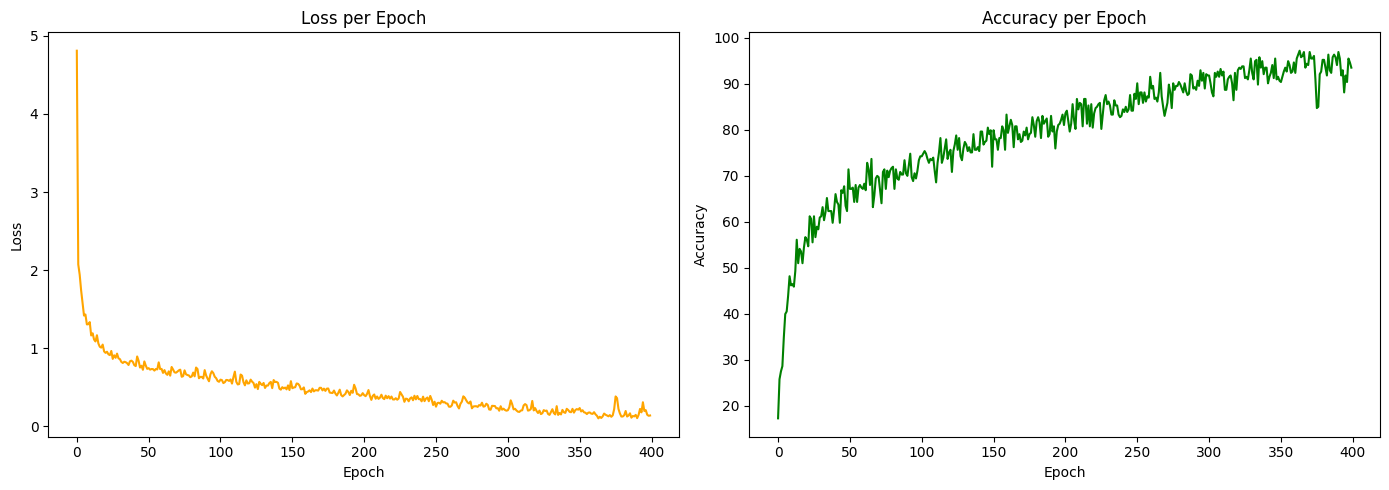

In [ ]:
history1.plot()

## Section I - Customized DataLoader Usage - Without Y

To train another deep neural network that predicts the 'Class' label using all features **except 'Y'**, we create a new `DiabetesDataset` from a `DataFrame` that excludes the `'Y'` column. This dataset is then wrapped in a PyTorch `DataLoader`. We tune the hyperparameters (learning rate and number of epochs) in the same manner as before. Then, we train a new model using the best combination of these hyperparameters.

#### Create a DataLoader without 'Y' column

Drop column `'Y'` from `train_df` before passing it to the `DiabetesDataset` objects

In [ ]:
train_dataset_without_y = DiabetesDataset(train_df.drop(columns=['Y']))
test_dataset_without_y = DiabetesDataset(test_df.drop(columns=['Y']))

train_dataloader_without_y = DataLoader(train_dataset_without_y, batch_size=10, shuffle=True)
test_dataloader_without_y = DataLoader(test_dataset_without_y, batch_size=10, shuffle=True)

Define new input size

In [ ]:
input_size_without_y = df.drop(columns=['Y', 'Class']).shape[1]  # Number of features (10)

Hidden and output sizes remain.

#### Hyperparameter Tuning

Calibrate

In [ ]:
# lrs = [0.0001, 0.001, 0.01, 0.1]
# all_losses = dict()
# all_accuracies = dict()

# for lr in tqdm(lrs, "Hyperparameter Calibration"):
#     intermediate_model = SimpleNet(input_size_without_y, hidden_size, output_size)
#     intermediate_optimizer = optim.Adam(intermediate_model.parameters(), lr=lr)
#     intermediate_history = intermediate_model.fit(train_dataloader_without_y, intermediate_optimizer, n_epochs=1000,
#                                                   log_interval=50)
#     all_losses[lr] = intermediate_history.losses
#     all_accuracies[lr] = intermediate_history.accuracies

Hyperparameter Calibration:   0%|          | 0/4 [00:00<?, ?it/s]

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 7.8885, Accuracy: 5.38%
Epoch 50/1000, Loss: 2.1101, Accuracy: 22.10%
Epoch 100/1000, Loss: 1.9915, Accuracy: 27.48%
Epoch 150/1000, Loss: 1.9127, Accuracy: 32.01%
Epoch 200/1000, Loss: 1.8582, Accuracy: 32.01%
Epoch 250/1000, Loss: 1.8264, Accuracy: 32.01%
Epoch 300/1000, Loss: 1.7587, Accuracy: 33.71%
Epoch 350/1000, Loss: 1.7318, Accuracy: 33.43%
Epoch 400/1000, Loss: 1.7135, Accuracy: 37.39%
Epoch 450/1000, Loss: 1.6651, Accuracy: 39.38%
Epoch 500/1000, Loss: 1.6331, Accuracy: 39.94%
Epoch 550/1000, Loss: 1.6266, Accuracy: 41.08%
Epoch 600/1000, Loss: 1.6117, Accuracy: 40.23%
Epoch 650/1000, Loss: 1.5613, Accuracy: 43.34%
Epoch 700/1000, Loss: 1.5388, Accuracy: 44.19%
Epoch 750/1000, Loss: 1.5212, Accuracy: 45.61%
Epoch 800/1000, Loss: 1.4955, Accuracy: 43.06%
Epoch 850/1000, Loss: 1.4438, Accuracy: 48.44%
Epoch 900/1000, Loss: 1.4339, Accuracy: 48.73%
Epoch 950/1000, Loss: 1.4361, Accuracy: 47.31%
Epoch 1000/1000, Loss: 1.4015, Accuracy: 49.86%


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 3.5476, Accuracy: 11.90%
Epoch 50/1000, Loss: 1.9163, Accuracy: 28.05%
Epoch 100/1000, Loss: 1.7929, Accuracy: 30.31%
Epoch 150/1000, Loss: 1.4860, Accuracy: 47.31%
Epoch 200/1000, Loss: 1.3179, Accuracy: 52.69%
Epoch 250/1000, Loss: 1.1782, Accuracy: 57.79%
Epoch 300/1000, Loss: 1.0300, Accuracy: 63.17%
Epoch 350/1000, Loss: 0.9267, Accuracy: 66.29%
Epoch 400/1000, Loss: 0.7539, Accuracy: 72.52%
Epoch 450/1000, Loss: 0.7717, Accuracy: 70.54%
Epoch 500/1000, Loss: 0.5774, Accuracy: 80.74%
Epoch 550/1000, Loss: 0.6305, Accuracy: 76.49%
Epoch 600/1000, Loss: 0.5277, Accuracy: 81.59%
Epoch 650/1000, Loss: 0.5291, Accuracy: 80.74%
Epoch 700/1000, Loss: 0.3185, Accuracy: 89.52%
Epoch 750/1000, Loss: 0.3100, Accuracy: 90.37%
Epoch 800/1000, Loss: 0.4526, Accuracy: 85.27%
Epoch 850/1000, Loss: 0.1783, Accuracy: 95.75%
Epoch 900/1000, Loss: 0.3381, Accuracy: 87.82%
Epoch 950/1000, Loss: 0.1333, Accuracy: 96.60%
Epoch 1000/1000, Loss: 0.2077, Accuracy: 94.90%


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 4.8628, Accuracy: 13.03%
Epoch 50/1000, Loss: 2.3025, Accuracy: 10.20%
Epoch 100/1000, Loss: 2.3039, Accuracy: 11.05%
Epoch 150/1000, Loss: 2.3027, Accuracy: 11.05%
Epoch 200/1000, Loss: 2.3018, Accuracy: 7.93%
Epoch 250/1000, Loss: 2.3024, Accuracy: 11.05%
Epoch 300/1000, Loss: 2.3017, Accuracy: 9.63%
Epoch 350/1000, Loss: 2.3035, Accuracy: 11.61%
Epoch 400/1000, Loss: 2.3027, Accuracy: 9.07%
Epoch 450/1000, Loss: 2.3042, Accuracy: 11.61%
Epoch 500/1000, Loss: 2.3028, Accuracy: 11.05%
Epoch 550/1000, Loss: 2.3043, Accuracy: 6.80%
Epoch 600/1000, Loss: 2.3013, Accuracy: 9.92%
Epoch 650/1000, Loss: 2.3020, Accuracy: 11.05%
Epoch 700/1000, Loss: 2.3017, Accuracy: 9.63%
Epoch 750/1000, Loss: 2.3048, Accuracy: 8.50%
Epoch 800/1000, Loss: 2.3023, Accuracy: 11.05%
Epoch 850/1000, Loss: 2.3047, Accuracy: 11.05%
Epoch 900/1000, Loss: 2.3047, Accuracy: 8.50%
Epoch 950/1000, Loss: 2.3016, Accuracy: 9.07%
Epoch 1000/1000, Loss: 2.3020, Accuracy: 8.78%


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 14.2783, Accuracy: 12.75%
Epoch 50/1000, Loss: 2.3302, Accuracy: 9.35%
Epoch 100/1000, Loss: 2.3283, Accuracy: 8.50%
Epoch 150/1000, Loss: 2.3235, Accuracy: 7.65%
Epoch 200/1000, Loss: 2.3257, Accuracy: 10.20%
Epoch 250/1000, Loss: 2.3361, Accuracy: 4.82%
Epoch 300/1000, Loss: 2.3248, Accuracy: 6.80%
Epoch 350/1000, Loss: 2.3255, Accuracy: 7.93%
Epoch 400/1000, Loss: 2.3279, Accuracy: 7.65%
Epoch 450/1000, Loss: 2.3337, Accuracy: 8.78%
Epoch 500/1000, Loss: 2.3334, Accuracy: 7.65%
Epoch 550/1000, Loss: 2.3286, Accuracy: 7.37%
Epoch 600/1000, Loss: 2.3248, Accuracy: 9.63%
Epoch 650/1000, Loss: 2.3295, Accuracy: 10.48%
Epoch 700/1000, Loss: 2.3250, Accuracy: 8.78%
Epoch 750/1000, Loss: 2.3177, Accuracy: 10.48%
Epoch 800/1000, Loss: 2.3262, Accuracy: 9.35%
Epoch 850/1000, Loss: 2.3363, Accuracy: 11.61%
Epoch 900/1000, Loss: 2.3360, Accuracy: 9.07%
Epoch 950/1000, Loss: 2.3255, Accuracy: 10.20%
Epoch 1000/1000, Loss: 2.3217, Accuracy: 7.93%


Plot loss and accuracy curves

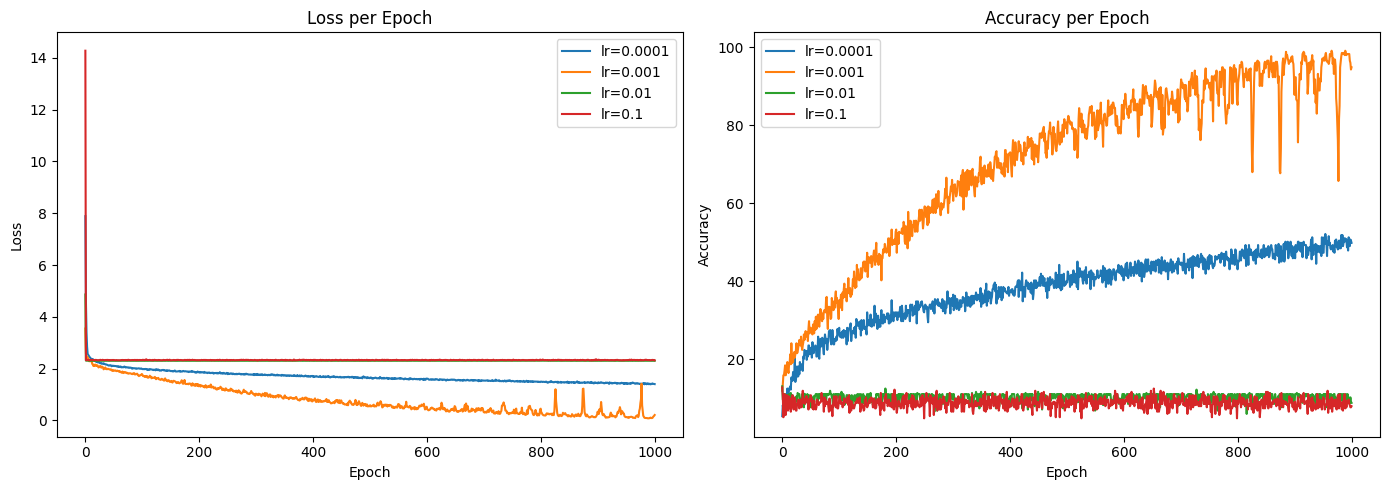

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# # Left: Loss plot
# for lr in lrs:
#     ax1.plot(all_losses[lr], label=f"lr={lr}")
# ax1.set_title("Loss per Epoch")
# ax1.set_xlabel("Epoch")
# ax1.set_ylabel("Loss")
# ax1.legend()

# # Right: Accuracy plot
# for lr in lrs:
#     ax2.plot(all_accuracies[lr], label=f"lr={lr}")
# ax2.set_title("Accuracy per Epoch")
# ax2.set_xlabel("Epoch")
# ax2.set_ylabel("Accuracy")
# ax2.legend()

# plt.tight_layout()
# plt.show()

Determination

The plot suggests that a **learning rate of 0.001** appears to yield good performance, with the loss steadily decreasing toward zero and the accuracy reaching around 95% by epoch 700. In comparison, the other learning rates tend to plateau early, struggling to learn (learning rates 0.01 and 0.1). Given this comparison, 0.001 seems to be a strong candidate for the optimal learning rate. Regarding the number of epochs, it might be safer to choose **550 epochs**. Although it reaches "only" around 90% accuracy, it appears further from the point of model divergence and may be less prone to overfitting, offering a good balance between effective learning and training efficiency.

In [ ]:
learning_rate_without_y = 0.001
n_epochs_without_y = 550

#### Train Model

Instantiate new model and optimizer

In [ ]:
model2 = SimpleNet(input_size_without_y, hidden_size, output_size)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate_without_y)

Train

In [ ]:
history2 = model2.fit(train_dataloader_without_y, optimizer2, n_epochs=n_epochs_without_y)

Epochs:   0%|          | 0/550 [00:00<?, ?it/s]

Epoch 1/550, Loss: 3.7417, Accuracy: 7.37%
Epoch 10/550, Loss: 2.2618, Accuracy: 19.83%
Epoch 20/550, Loss: 2.0413, Accuracy: 25.78%
Epoch 30/550, Loss: 2.0353, Accuracy: 24.65%
Epoch 40/550, Loss: 1.9605, Accuracy: 25.21%
Epoch 50/550, Loss: 1.8574, Accuracy: 28.61%
Epoch 60/550, Loss: 1.8260, Accuracy: 30.88%
Epoch 70/550, Loss: 1.7810, Accuracy: 35.13%
Epoch 80/550, Loss: 1.7470, Accuracy: 37.96%
Epoch 90/550, Loss: 1.6807, Accuracy: 37.11%
Epoch 100/550, Loss: 1.6700, Accuracy: 38.81%
Epoch 110/550, Loss: 1.5943, Accuracy: 39.09%
Epoch 120/550, Loss: 1.6067, Accuracy: 42.78%
Epoch 130/550, Loss: 1.5356, Accuracy: 41.93%
Epoch 140/550, Loss: 1.5197, Accuracy: 41.93%
Epoch 150/550, Loss: 1.4329, Accuracy: 46.74%
Epoch 160/550, Loss: 1.4529, Accuracy: 47.03%
Epoch 170/550, Loss: 1.3759, Accuracy: 48.44%
Epoch 180/550, Loss: 1.3575, Accuracy: 48.73%
Epoch 190/550, Loss: 1.3487, Accuracy: 50.14%
Epoch 200/550, Loss: 1.3248, Accuracy: 51.56%
Epoch 210/550, Loss: 1.2290, Accuracy: 54.96%


Plot loss and accuracy curves

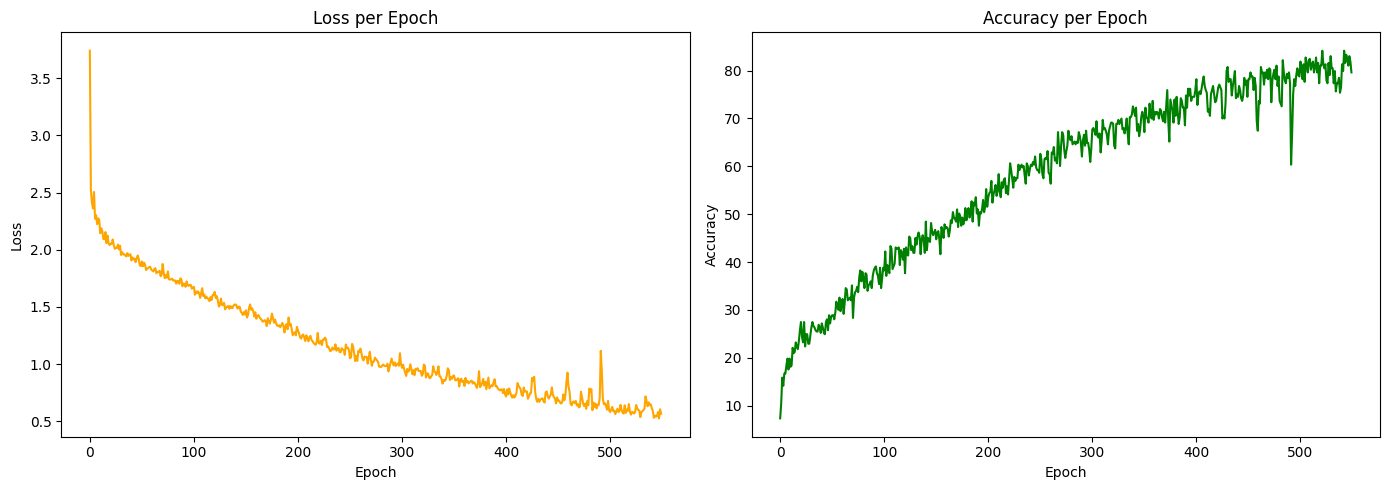

In [ ]:
history2.plot()

## Section J - Test Network Performance

We now evaluate `model1` and `model2` on the test set using the `predict` method from the `SimpleNet` class, which both models were instantiated from. This method switches the model to evaluation mode and disables gradient tracking to optimize performance during inference. It then loops through the test data in batches, feeds each batch through the model, and collects the predicted class labels. The true labels are also gathered, with an adjustment to account for 0-based indexing. Finally, it returns the full set of predicted and true labels as tensors, which can then be used to measure model accuracy or other metrics.

In [ ]:
predicted_labels1, true_labels1 = model1.predict(test_dataloader)
predicted_labels2, true_labels2 = model2.predict(test_dataloader_without_y)

Note that we provide `test_dataloader` to `model1` and `test_dataloader_without_y` to `model2`. These data loaders contain the test sets that were created earlier using Scikit-learn’s train_test_split method. They were set aside specifically for this testing phase to ensure an unbiased evaluation of the models' performance.

Compare the first model predictions to the true labels

In [ ]:
predicted_labels1 == true_labels1

tensor([False,  True,  True, False, False,  True,  True,  True, False,  True,
        False,  True, False, False,  True,  True,  True, False, False,  True,
         True, False,  True,  True,  True, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True, False,
        False,  True,  True,  True,  True, False,  True,  True, False, False,
        False,  True, False,  True,  True,  True, False, False, False,  True,
        False,  True, False, False,  True, False,  True, False,  True, False,
        False,  True, False,  True,  True, False,  True, False,  True,  True,
         True,  True,  True, False, False, False,  True,  True, False])

We can see some True values...

Compare the second model predictions to the true labels

In [ ]:
predicted_labels2 == true_labels2

tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False,  True, False, False, False,
        False, False, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False])

Doesn't look like very effective predictions...

Let's evaluate accuracy

In [ ]:
accuracy1 = (predicted_labels1 == true_labels1).float().mean().item()
accuracy2 = (predicted_labels2 == true_labels2).float().mean().item()

print(f"Model1 Accuracy: {accuracy1 * 100:.2f}%")
print(f"Model2 Accuracy: {accuracy2 * 100:.2f}%")

Model1 Accuracy: 57.30%
Model2 Accuracy: 13.48%


## Section K - Explain Network Performance Differences

The first model, which was trained on features that included the Y values, achieved a decent accuracy of 57.30% on the test set, indicating evident learning. In contrast, the second model - trained on data that excluded the Y values - only reached an accuracy of 13.48%. While this is slightly better than random guessing (10% for 10 classes), it’s still quite low and suggests that the model struggled to learn meaningful patterns from the available features.

Interestingly, the second model performed significantly better on the training set, which points to overfitting — it learned patterns specific to the training data that didn’t generalize to the test set.

Overall, this experiment clearly shows the importance of the Y values in the feature set. The first model likely didn’t learn to associate the sampling features with the correct classes in a meaningful way; instead, it mainly learned the direct correlation between the Y values and the target classes.

Wait... maybe we don't use enough neurons?
Let’s try increasing the model capacity by using 1024 hidden units in each hidden layer.

To get a quick sense of whether this makes a difference, we can start by training the model for just 300 epochs. That should be enough to observe whether there's a significant improvement in accuracy. If the results show meaningful progress toward higher accuracy, we can then consider extending the training further.

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Loss: 32.4411, Accuracy: 9.63%
Epoch 50/300, Loss: 2.0543, Accuracy: 20.11%
Epoch 100/300, Loss: 1.8987, Accuracy: 29.18%
Epoch 150/300, Loss: 1.5243, Accuracy: 41.08%
Epoch 200/300, Loss: 1.1803, Accuracy: 55.81%
Epoch 250/300, Loss: 0.9021, Accuracy: 64.59%
Epoch 300/300, Loss: 0.7853, Accuracy: 71.39%
Model2h Accuracy: 11.24%


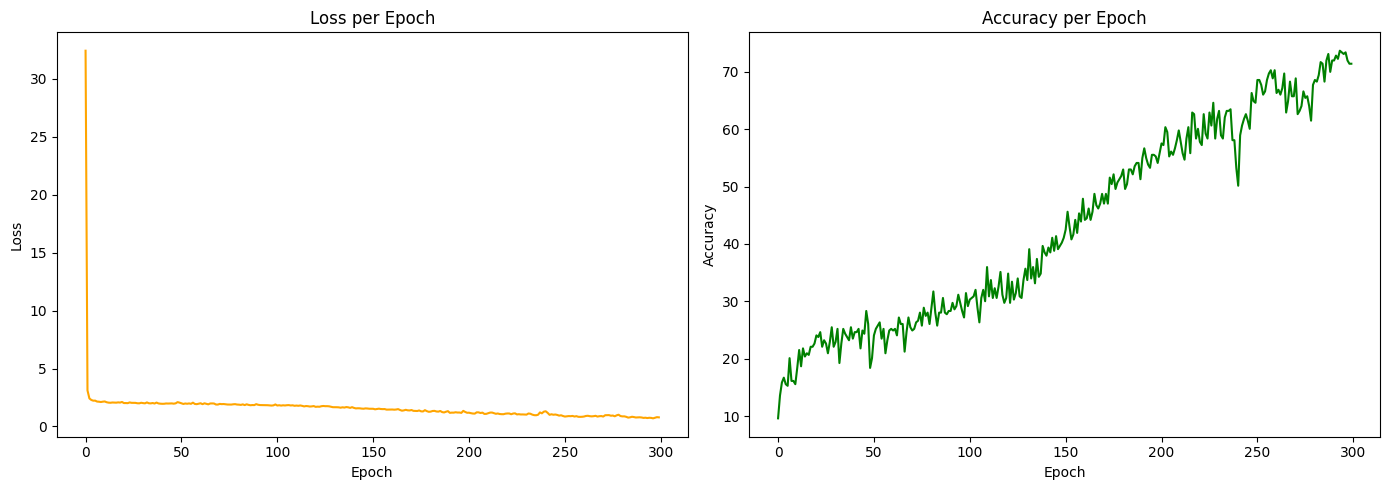

In [ ]:
# Define model and optimizer
experimental_hidden_size = 1024
model2h = SimpleNet(input_size_without_y, experimental_hidden_size, output_size)  # 'h' for 'heavy'
optimizer2h = optim.Adam(model2h.parameters(), lr=0.001)

# Train
history2h = model2h.fit(train_dataloader_without_y, optimizer2h, n_epochs=300, log_interval=50)

# Predict
predicted_labels2h, true_labels2h = model2h.predict(test_dataloader_without_y)

# Evaluate
accuracy2h = (predicted_labels2h == true_labels2h).float().mean().item()
print(f"Model2h Accuracy: {accuracy2h * 100:.2f}%")
history2h.plot()

A model similar to `model2`, but with 1024 hidden units in each hidden layer, achieved an accuracy of 11.24% which is not an improvement, altough the increased training time and computational cost associated with a larger model.

Maybe we need less neurons?

Let's insert the previous code block into a function:

In [ ]:
def test(experimental_hidden_size: int, experimental_learning_rate: float, optimizer: str = 'adam') -> float:
    """
    Trains and evaluates a SimpleNet model using a specified hidden layer size, learning rate, and optimizer.

    Args:
        experimental_hidden_size (int): The number of neurons to use in each hidden layer.
        experimental_learning_rate (float): The learning rate to use for training.
        optimizer (str, optional): The optimizer to use ('adam' or 'sgd'). Default is 'adam'.

    Returns:
        float: The accuracy of the model on the test set (excluding Y values), as a float between 0 and 1.
    """
    assert optimizer in ['adam', 'sgd'], "optim must be 'adam' or 'sgd'"

    # Initialize the SimpleNet model with the given hidden layer size
    test_model = SimpleNet(input_size_without_y, experimental_hidden_size, output_size)

    # Instantiate the optimizer with the chosen class and learning rate
    OptimizerClass = torch.optim.Adam if optimizer == 'adam' else torch.optim.SGD
    optimizer = OptimizerClass(test_model.parameters(), lr=experimental_learning_rate)

    # Train model model and plot performance
    test_history = test_model.fit(train_dataloader_without_y, optimizer, n_epochs=300, log_interval=50)
    test_history.plot()

    # Predict on the test data (without Y values) and evaluate the model
    pred, true = test_model.predict(test_dataloader_without_y)
    acc = (pred == true).float().mean().item()

    # Print the accuracy and return it
    print(f"Accuracy: {acc * 100:.2f}%")
    return acc

Now let's use 32 hidden units in each hidden layer:

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Loss: 9.4447, Accuracy: 9.92%
Epoch 50/300, Loss: 2.0068, Accuracy: 21.25%
Epoch 100/300, Loss: 1.8814, Accuracy: 28.90%
Epoch 150/300, Loss: 1.7496, Accuracy: 34.84%
Epoch 200/300, Loss: 1.6836, Accuracy: 36.83%
Epoch 250/300, Loss: 1.6359, Accuracy: 38.24%
Epoch 300/300, Loss: 1.5353, Accuracy: 43.34%


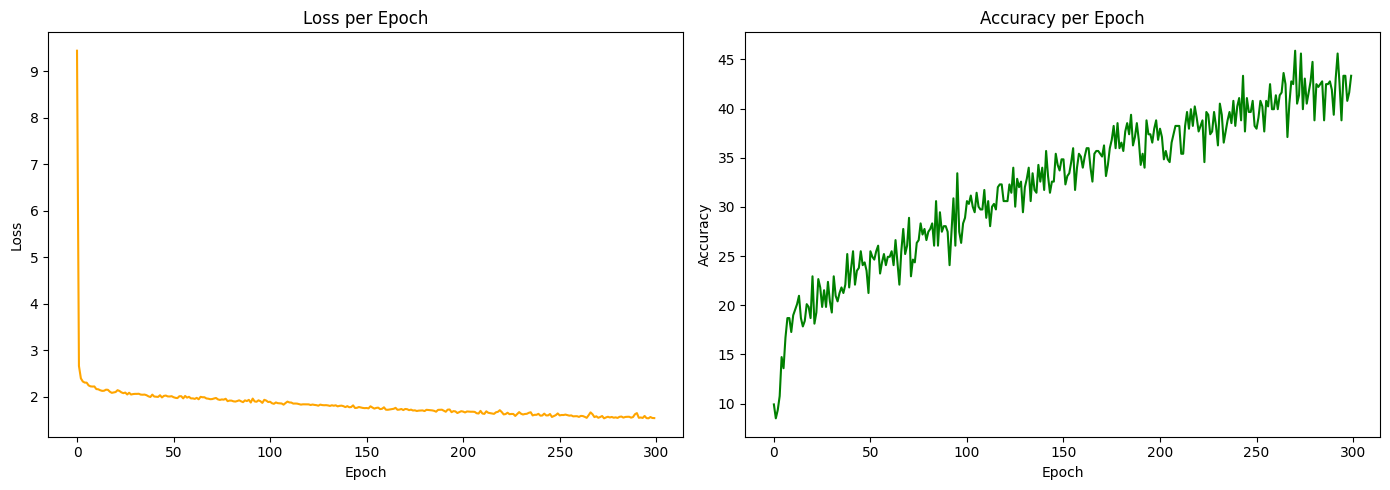

Accuracy: 20.22%


0.20224718749523163

In [ ]:
test(experimental_hidden_size=32, experimental_learning_rate=0.001, optimizer='adam')

The model with 32 hidden neurons in each hidden layer outperformed the one with 64 neurons, achieving a test accuracy of 20.22%. Although this marks a improvement, the accuracy remains quite low overall. Interestingly, this result is only marginally lower than the accuracy achieved by the much larger model with 1024 hidden neurons, suggesting that increasing model size beyond a certain point may be wasteful and unnecessary in this case.

It appears that the model with 32 hidden neurons each hidden layer learns a bit more effectively. To enhance this further, we could try increasing the learning rate to allow the model to take larger learning steps.

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Loss: 3.2903, Accuracy: 9.92%
Epoch 50/300, Loss: 2.3027, Accuracy: 11.05%
Epoch 100/300, Loss: 2.3050, Accuracy: 11.05%
Epoch 150/300, Loss: 2.3005, Accuracy: 11.05%
Epoch 200/300, Loss: 2.3044, Accuracy: 9.63%
Epoch 250/300, Loss: 2.3041, Accuracy: 11.05%
Epoch 300/300, Loss: 2.3048, Accuracy: 10.76%


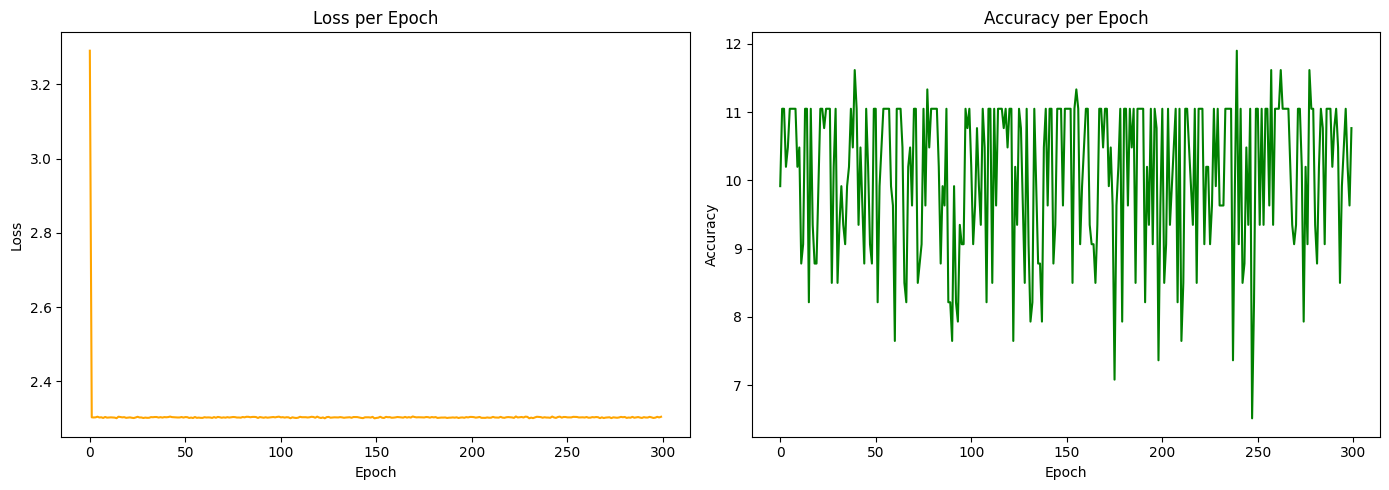

Accuracy: 7.87%


0.07865168899297714

In [ ]:
test(experimental_hidden_size=32, experimental_learning_rate=0.01, optimizer='adam')

It doesn't seem to help. Accuracy of 7.87% is the lowest we achieved so far on the test set without the Y values.

Maybe we should try a different optimizer?
Let's try SGD:

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Loss: 4.5659, Accuracy: 11.90%
Epoch 50/300, Loss: 1.9984, Accuracy: 24.65%
Epoch 100/300, Loss: 1.9207, Accuracy: 31.73%
Epoch 150/300, Loss: 1.8460, Accuracy: 33.43%
Epoch 200/300, Loss: 1.7899, Accuracy: 33.99%
Epoch 250/300, Loss: 1.7250, Accuracy: 35.98%
Epoch 300/300, Loss: 1.6859, Accuracy: 40.79%


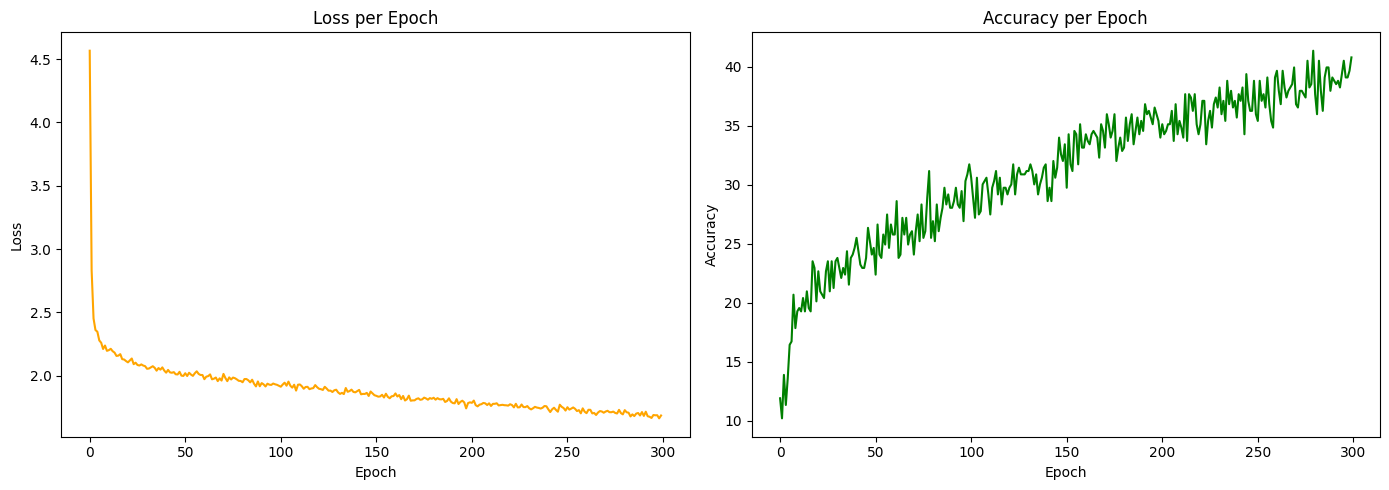

Accuracy: 11.24%


0.11235955357551575

In [ ]:
test(experimental_hidden_size=64, experimental_learning_rate=0.001, optimizer='sgd')

We’re back to an accuracy of around 11%...
Let's stick with the original configuration of `model2` for now.

## Section L - Percentile Calculation

In this section, we need to divide the Y variable into percentiles instead of deciles. For each sample, we determine which percentile class it belongs to and store that value in its corresponding Class variable.

#### Clone DataFrame

Instead of reading the `.csv` file again, we can simply clone the existing `DataFrame` already in memory.

In [ ]:
df_percentiles = df.copy()

#### Calculate Percentiles

Select the `Y` column from the `DataFrame` and calculate the percentile boundaries, similar to how we previously computed the decile boundaries.

In [ ]:
y_percentiles = df_percentiles['Y']
percentiles = {
    k: (float(y_percentiles.quantile((k - 1) / 100)), float(y_percentiles.quantile(k / 100))) for k in range(1, 101)
}

Verify that we have 100 percentiles

In [ ]:
assert len(percentiles) == 100, f"Expected 100 percentiles, got {len(percentiles)}"
print("✅ Passed!")

✅ Passed!


Print some percentiles

In [ ]:
for i, k in enumerate(tqdm(percentiles.keys(), desc="Percentiles")):
    if i < 5 or i >= len(percentiles) - 5:
        lower_bound, upper_bound = percentiles[k]
        suffix = suffixes.get(k % 10, 'th')
        sep = '\t\t' if k < 10 else '\t'
        print(f"{k}{suffix} percentile:{sep}({lower_bound:.2f}, {upper_bound:.2f})")


Percentiles:   0%|          | 0/100 [00:00<?, ?it/s]

1st percentile:		(25.00, 39.41)
2nd percentile:		(39.41, 42.82)
3rd percentile:		(42.82, 47.23)
4th percentile:		(47.23, 49.00)
5th percentile:		(49.00, 51.00)
96th percentile:	(282.90, 292.36)
97th percentile:	(292.36, 300.85)
98th percentile:	(300.85, 310.00)
99th percentile:	(310.00, 319.36)
100th percentile:	(319.36, 346.00)


Attach percentiles classes to the new `DataFrame` using Pandas `qcut` method

In [ ]:
df_percentiles['Class'] = pd.qcut(df_percentiles['Y'], q=100, labels=False) + 1
df_percentiles.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,Class
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,55
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,20
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,51
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,74
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,48


Class sanity test

In [ ]:
# Store the first sample Y value
first_perc_sample_Y_value = float(df_percentiles.head(1)['Y'].iloc[0])

# Find the decile class of the first sample
first_sample_exptected_percentile_class = 100  # default to the highest decile
for k, (lower, upper) in tqdm(percentiles.items(), desc="Find Class"):
    if lower <= first_perc_sample_Y_value <= upper:
        first_sample_exptected_percentile_class = k
        break  # stop at the first match

# Show expected decile class
first_sample_exptected_percentile_class

Find Class:   0%|          | 0/100 [00:00<?, ?it/s]

55

In [ ]:
first_sample_actual_percentile_class = int(df_percentiles.head(1)['Class'].iloc[0])
assert first_sample_actual_percentile_class == first_sample_exptected_percentile_class, \
    f"Expected percentile class {first_sample_exptected_percentile_class}, got {first_sample_actual_percentile_class}"
print("✅ Passed!")

✅ Passed!


## Section M - Repeat Sections H-J for Percentiles

In this section, we repeat steps H through J using the updated Class variable. The new target accuracy for this task is 0.5%.

Train-Test split the new `DataFrame`

In [ ]:
train_df_percentiles, test_df_percentiles = train_test_split(df_percentiles, test_size=0.2, random_state=42)

Note that now the output size is 100

In [ ]:
output_size_percentiles = len(percentiles)

#### Repeat the process for Model3 -- Model1 with Percentiles

Instantiate train and test `DiabetesDataset` objects

In [ ]:
train_set_percentiles = DiabetesDataset(train_df_percentiles)
test_set_percentiles = DiabetesDataset(test_df_percentiles)

Wrap these `DiabetesDataset` objects with `DataLoaders`

In [ ]:
train_dataloader_percentiles = DataLoader(train_set_percentiles, batch_size=10, shuffle=True)
test_dataloader_percentiles = DataLoader(test_set_percentiles, batch_size=10, shuffle=True)

Verify the selected hyperparameters for both `model1` and `model2` remain unchanged

In [ ]:
print(f"{learning_rate=}\n{n_epochs=}")

learning_rate=0.001
n_epochs=400


Now, instantiate `model3`, which will be trained on the new `DataLoader` containing the training set labeled with percentile-based class labels.
We train the model for 400 epochs while using the Adam optimizer with a learning rate of 0.001, consistent with the configuration used for `model1`.
After training the model, we plot its performance history to visualize how it learned over time.

Epochs:   0%|          | 0/400 [00:00<?, ?it/s]

Epoch 1/400, Loss: 9.3228, Accuracy: 1.42%
Epoch 10/400, Loss: 3.7408, Accuracy: 6.23%
Epoch 20/400, Loss: 3.0518, Accuracy: 14.45%
Epoch 30/400, Loss: 2.7066, Accuracy: 16.43%
Epoch 40/400, Loss: 2.5104, Accuracy: 20.96%
Epoch 50/400, Loss: 2.2731, Accuracy: 26.91%
Epoch 60/400, Loss: 2.1493, Accuracy: 30.88%
Epoch 70/400, Loss: 2.0243, Accuracy: 32.86%
Epoch 80/400, Loss: 1.9250, Accuracy: 36.26%
Epoch 90/400, Loss: 1.8082, Accuracy: 37.11%
Epoch 100/400, Loss: 1.7516, Accuracy: 40.51%
Epoch 110/400, Loss: 1.6510, Accuracy: 40.79%
Epoch 120/400, Loss: 1.5535, Accuracy: 46.46%
Epoch 130/400, Loss: 1.4378, Accuracy: 51.84%
Epoch 140/400, Loss: 1.3866, Accuracy: 53.26%
Epoch 150/400, Loss: 1.3256, Accuracy: 55.81%
Epoch 160/400, Loss: 1.2370, Accuracy: 57.51%
Epoch 170/400, Loss: 1.1404, Accuracy: 62.32%
Epoch 180/400, Loss: 1.0929, Accuracy: 63.17%
Epoch 190/400, Loss: 1.0945, Accuracy: 64.87%
Epoch 200/400, Loss: 1.1098, Accuracy: 60.62%
Epoch 210/400, Loss: 1.0500, Accuracy: 61.47%
E

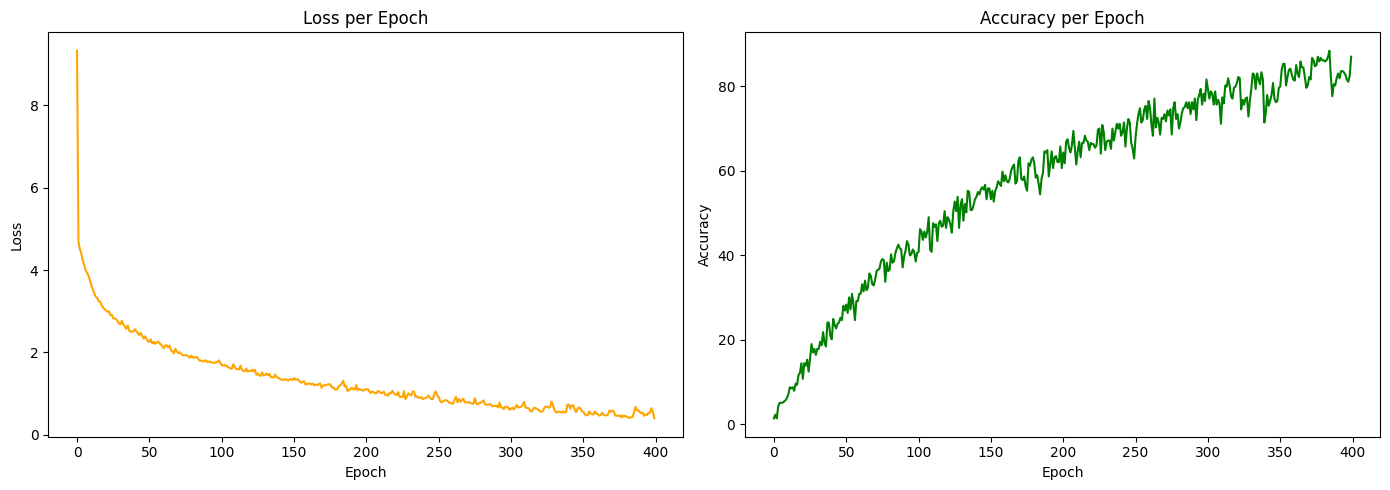

In [ ]:
model3 = SimpleNet(input_size, hidden_size, output_size_percentiles)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
history3 = model3.fit(train_dataloader_percentiles, optimizer3, n_epochs=n_epochs)
history3.plot()

Looks like we can use only 170 epochs, to avoid overfitting

Epochs:   0%|          | 0/170 [00:00<?, ?it/s]

Epoch 1/170, Loss: 10.0350, Accuracy: 1.42%
Epoch 10/170, Loss: 3.7573, Accuracy: 6.52%
Epoch 20/170, Loss: 3.1593, Accuracy: 10.76%
Epoch 30/170, Loss: 2.8429, Accuracy: 15.30%
Epoch 40/170, Loss: 2.6306, Accuracy: 19.55%
Epoch 50/170, Loss: 2.4957, Accuracy: 20.40%
Epoch 60/170, Loss: 2.3157, Accuracy: 26.06%
Epoch 70/170, Loss: 2.1189, Accuracy: 32.86%
Epoch 80/170, Loss: 2.0421, Accuracy: 33.71%
Epoch 90/170, Loss: 1.9197, Accuracy: 38.81%
Epoch 100/170, Loss: 1.7387, Accuracy: 43.63%
Epoch 110/170, Loss: 1.6409, Accuracy: 44.48%
Epoch 120/170, Loss: 1.4639, Accuracy: 48.44%
Epoch 130/170, Loss: 1.3391, Accuracy: 52.69%
Epoch 140/170, Loss: 1.2143, Accuracy: 59.77%
Epoch 150/170, Loss: 1.1608, Accuracy: 59.49%
Epoch 160/170, Loss: 1.0294, Accuracy: 65.16%
Epoch 170/170, Loss: 0.9365, Accuracy: 70.54%


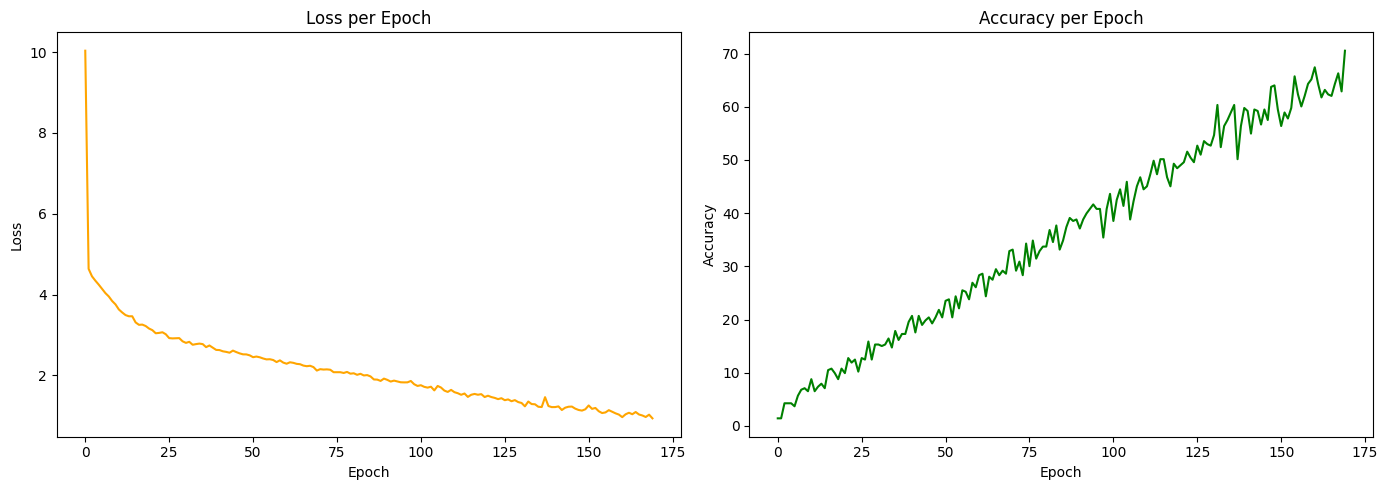

In [ ]:
n_epochs_percentiles = 170
model3 = SimpleNet(input_size, hidden_size, output_size_percentiles)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
history3 = model3.fit(train_dataloader_percentiles, optimizer3, n_epochs=n_epochs_percentiles)
history3.plot()

These cureves are better.

Let's plot `history1` again for comparison

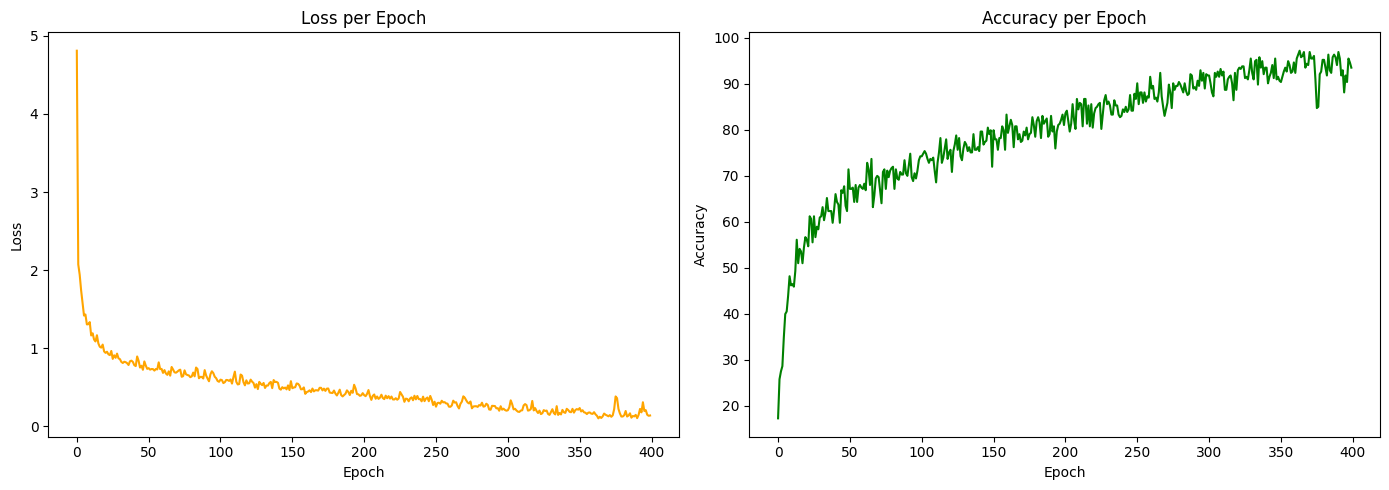

In [ ]:
history1.plot()

It appears that `model3`, which is similar to `model1` but trained on percentiles instead of deciles, produced performance curves with a similar range of values, but the curves of `model3` are **noticeably smoother and less noisy**, indicating more stable learning during training.

#### Repeat the process for Model4 -- Model2 with Percentiles

Repeat the process of creating `DataLoaders`s for model4, a model that we train on a training set with features that doesn't include Y values, and the labels are percentile classes.

In [ ]:
train_df_percentiles_wo_y, test_df_percentiles_wo_y = train_test_split(df_percentiles.drop(columns=['Y']),
                                                                       test_size=0.2, random_state=42)

train_set_percentiles_wo_y = DiabetesDataset(train_df_percentiles_wo_y)
test_set_percentiles_wo_y = DiabetesDataset(test_df_percentiles_wo_y)

train_dataloader_percentiles_wo_y = DataLoader(train_set_percentiles_wo_y, batch_size=10, shuffle=True)
test_dataloader_percentiles_wo_y = DataLoader(test_set_percentiles_wo_y, batch_size=10, shuffle=True)

print(f"{learning_rate_without_y=}\n{n_epochs_without_y=}")

learning_rate_without_y=0.001
n_epochs_without_y=550


Now, we instantiate `model4`, which will be trained on the new DataLoader containing the training set labeled with percentile-based class labels, without the actual Y values. We train the model for 550 epochs while using the Adam optimizer with a learning rate of 0.001, consistent with the configuration used for `model2`.
After training the model, we plot its performance history to visualize how it learned over time.

Epochs:   0%|          | 0/550 [00:00<?, ?it/s]

Epoch 1/550, Loss: 8.6202, Accuracy: 0.57%
Epoch 10/550, Loss: 4.4974, Accuracy: 2.27%
Epoch 20/550, Loss: 4.2761, Accuracy: 3.68%
Epoch 30/550, Loss: 4.1117, Accuracy: 4.82%
Epoch 40/550, Loss: 4.0074, Accuracy: 5.67%
Epoch 50/550, Loss: 3.8446, Accuracy: 6.23%
Epoch 60/550, Loss: 3.7152, Accuracy: 10.76%
Epoch 70/550, Loss: 3.6295, Accuracy: 9.35%
Epoch 80/550, Loss: 3.4753, Accuracy: 12.46%
Epoch 90/550, Loss: 3.3774, Accuracy: 16.71%
Epoch 100/550, Loss: 3.2995, Accuracy: 17.00%
Epoch 110/550, Loss: 3.1181, Accuracy: 22.38%
Epoch 120/550, Loss: 3.0604, Accuracy: 23.51%
Epoch 130/550, Loss: 2.9200, Accuracy: 24.65%
Epoch 140/550, Loss: 2.8041, Accuracy: 30.03%
Epoch 150/550, Loss: 2.6610, Accuracy: 30.31%
Epoch 160/550, Loss: 2.6138, Accuracy: 33.99%
Epoch 170/550, Loss: 2.5708, Accuracy: 34.56%
Epoch 180/550, Loss: 2.3943, Accuracy: 37.68%
Epoch 190/550, Loss: 2.3492, Accuracy: 39.66%
Epoch 200/550, Loss: 2.1846, Accuracy: 43.06%
Epoch 210/550, Loss: 2.0397, Accuracy: 44.76%
Epoch 

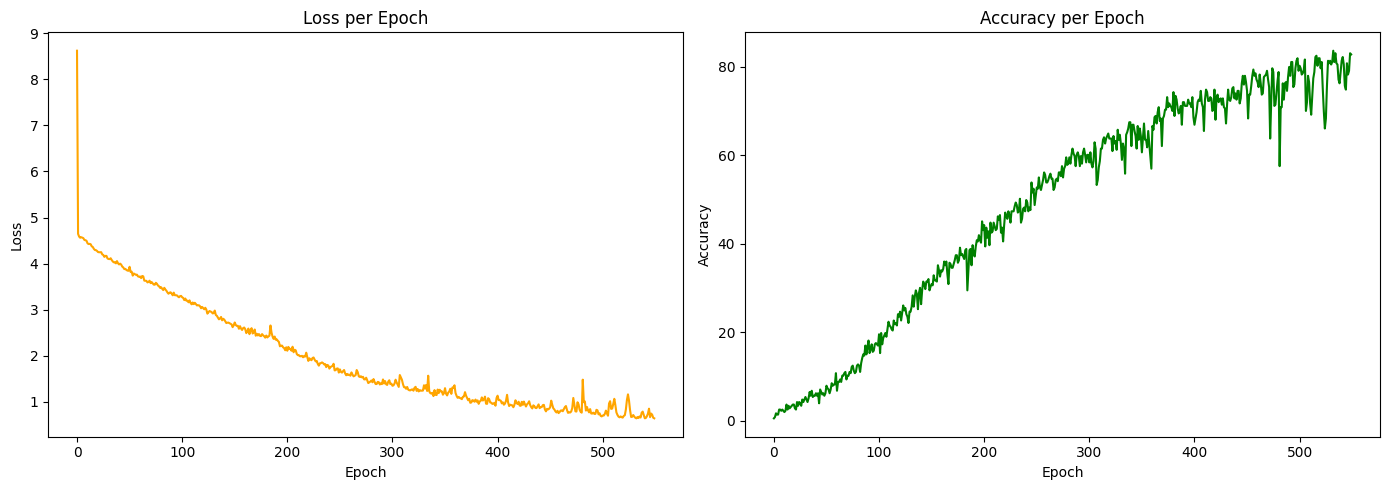

In [ ]:
model4 = SimpleNet(input_size_without_y, hidden_size, output_size_percentiles)
optimizer4 = optim.Adam(model4.parameters(), lr=learning_rate_without_y)
history4 = model4.fit(train_dataloader_percentiles_wo_y, optimizer4, n_epochs=n_epochs_without_y)
history4.plot()

Let's plot `history2` again for comparison

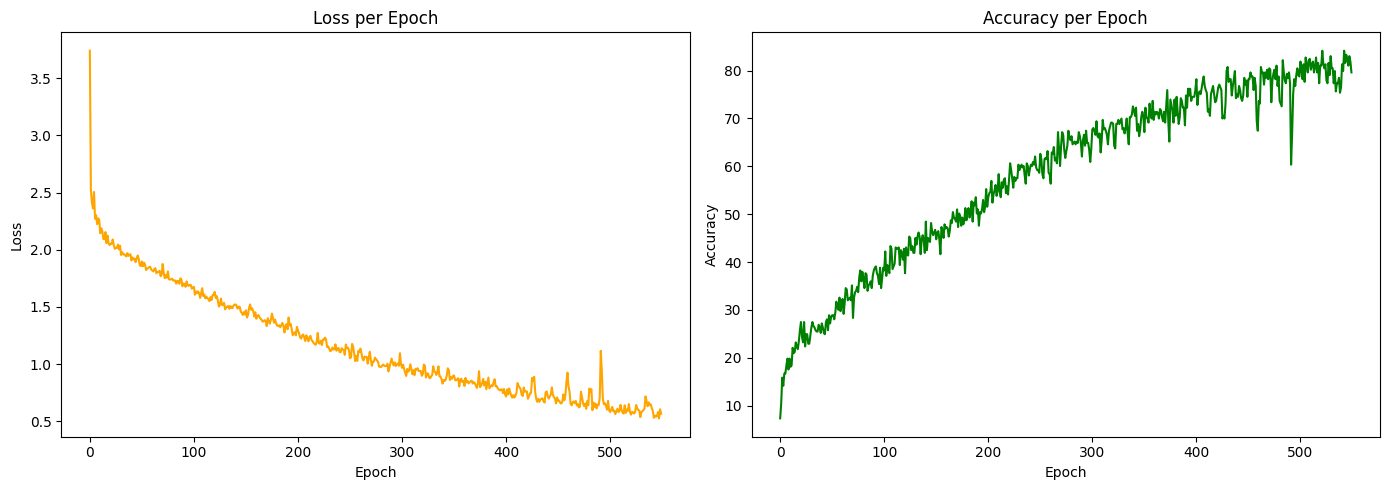

In [ ]:
history2.plot()

It seems that `model4` achieved slightly better loss and accuracy curves in terms of values and noise, indicating an improvement.

#### Test Network Performance

Predict

In [ ]:
predicted_labels3, true_labels3 = model3.predict(test_dataloader_percentiles)
predicted_labels4, true_labels4 = model4.predict(test_dataloader_percentiles_wo_y)

Evaluate

In [ ]:
accuracy3 = (predicted_labels3 == true_labels3).float().mean().item()
accuracy4 = (predicted_labels4 == true_labels4).float().mean().item()

print(f"Model3 Accuracy: {accuracy3 * 100:.2f}%")
print(f"Model4 Accuracy: {accuracy4 * 100:.2f}%")

Model3 Accuracy: 2.25%
Model4 Accuracy: 1.12%


The accuracy results of models 3 and 4 appear to be significantly worse compared to those of models 1 and 2, respectively.

**Accuracy Level Summary:**

- Model1 [deciles with Y]: **57.30%**
- Model2 [deciles without Y]: **13.48%**
- Model3 [percentiles with Y]: **2.25%**
- Model4 [percentiles without Y]: **1.12%**

## Section N - Deciles vs. Percentiles

The network performance results clearly indicates that models trained on deciles outperform those trained on percentiles. For example, the deciles-based model that includes the Y variable achieves an accuracy of **57.30%**, while its corresponding percentile-based model only reaches **2.25%**. This significant performance gap suggests that **deciles offer a more robust and stable target variable construction**. When the outputs are categorized into deciles, the neural network has fewer, more distinct classes to predict, reducing the noise and overfitting risk that can come with having too many granular categories. Additionally, even when the Y variable is not included, the deciles approach still performs substantially better (**13.48%** compared to **1.12%** for percentiles), which underscores the inherent advantage of having coarser, yet more informative, groupings.

After reflecting on these results, we can realize that the improved performance with deciles likely stems from their balance of granularity. By limiting the number of categories, deciles simplify the learning task for the neural network, allowing it to focus on broader, yet significant, distinctions in the data rather than getting lost in excessive detail. This simplification not only enhances the model's learning efficiency but also leads to more reliable predictive performance. The strategic grouping into deciles creates a more efficient classification structure, which ultimately translates into better overall results.

In other words, when we divide a variable like Y into deciles, we split the data into 10 groups of equal size. Each group represents 10% of the samples. This makes the classification task easier because the model only needs to learn to distinguish between 10 possible classes. With around 442 samples in the dataset, each class will have about 44 samples, giving the model enough data to learn from. On the other hand, dividing Y into percentiles creates 100 different classes, each representing 1% of the samples. That means each class will contain only about 4 or 5 samples. This makes the classification task much harder, because the model needs to distinguish between many more classes with much less data per class. It requires a more complex model, more training, and careful regularization to avoid overfitting.

## Section O - Regression Network

In this section, we are requested to train a regression neural network model, rather than converting the target variable Y into discrete classes. The network should take all features except for the 'Class' and 'Y' columns as inputs, and produce a single real valued output that approximates the original value of Y for each sample. In addition, we need to define the architecture of the regression model and select an appropriate loss function.

#### Define Regression Deep Neural Network

The following `RegressionNet` class defines a simple feedforward neural network tailored for regression tasks, where the goal is to predict a continuous value rather than a class label. The architecture consists of two hidden layers with ReLU activation functions and a final linear layer that outputs a single float per input sample. The forward method passes input data through these layers and returns the network's prediction. The model uses Mean Squared Error (MSE) as its loss function, which is standard for regression problems.

The class also includes two additional methods: fit and predict. The fit method trains the network using mini-batch gradient descent, logging the average loss at regular intervals to monitor training progress. The predict method evaluates the model on a given dataset without updating the weights, returning both the predicted values and their corresponding true targets.

In [ ]:
class RegressionNet(nn.Module):
    """
    A simple deep neural network for regression.

    This network consists of two hidden layers with ReLU activations, followed by a single output neuron
    that produces a continuous value. It is designed for regression tasks where the target is a real number.

    Args:
        input_size (int): Number of input features.
        hidden_size (int): Number of neurons in each hidden layer.
    """
    def __init__(self, input_size: int, hidden_size: int):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)  # Single float output
        self.relu = nn.ReLU()
        self.loss_func = nn.MSELoss()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Defines the forward pass of the network.

        Args:
            x (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: Output tensor of shape [batch_size].
        """
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x.squeeze(dim=1)

    def fit(self, dataloader: DataLoader, optimizer: optim.Optimizer, n_epochs: int = 100,
            log_interval: int = 10) -> History:
        """
        Trains the regression model using the provided DataLoader and optimizer.

        Args:
            dataloader (DataLoader): DataLoader that provides training data in batches.
            optimizer (Optimizer): Optimizer used to update the model parameters.
            n_epochs (int, optional): Number of training epochs. Defaults to 100.
            log_interval (int, optional): Frequency (in epochs) to print training progress. Defaults to 10.

        Returns:
            History: Object that stores the loss history over the training epochs.
        """
        history = History()
        for epoch in tqdm(range(1, n_epochs + 1), desc="Epochs"):
            self.train()
            running_loss = 0.0

            for batch_x, batch_y in dataloader:
                optimizer.zero_grad()
                outputs = self(batch_x)
                loss = self.loss_func(outputs, batch_y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            avg_loss = running_loss / len(dataloader)
            history.losses.append(avg_loss)

            if epoch % log_interval == 0 or epoch == 1:
                print(f"Epoch {epoch}/{n_epochs}, Loss: {avg_loss:.4f}")

        return history

    def predict(self, dataloader: DataLoader) -> tuple[torch.Tensor, torch.Tensor]:
        """
        Performs prediction on data from the given DataLoader.

        Args:
            dataloader (DataLoader): DataLoader containing the input data.

        Returns:
            tuple[torch.Tensor, torch.Tensor]: Tuple of (predicted_values, true_values)
        """
        self.eval()
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                outputs = self(batch_x)
                all_preds.append(outputs)
                all_targets.append(batch_y)

        return torch.cat(all_preds), torch.cat(all_targets)

##### Why MSE?

The MSE penalizes large errors more than small ones, helping the model focus on minimizing big mistakes. It's also smooth and differentiable, which makes it well-suited for gradient-based optimization.

#### Create a new `DataFrame` for the task

In [ ]:
df_reg = df.copy().drop(columns=['Class'])

Take a glance at it

In [ ]:
df_reg.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


#### Train-Test split the new `DataFrame` for regression

In [ ]:
train_df_reg, test_df_reg = train_test_split(df_reg, test_size=0.2, random_state=42)

#### Define new `Dataset` sub-class

The following `DiabetesRegressionDataset` class defines a custom PyTorch `Dataset` class for a diabetes regression task, where the input is a tabular DataFrame containing numeric features and a target column named `'Y'`. The class separates the features and the target, converts them to float32 tensors, and applies normalization to the features using their global mean and standard deviation. This normalization improves model performance by reducing the Mean Squared Error (MSE) and Mean Absolute Error (MAE). The dataset supports indexing and length operations, making it compatible with PyTorch's `DataLoader` for efficient batch processing during training and evaluation.

In [ ]:
from torch.utils.data import Dataset

class DiabetesRegressionDataset(Dataset):
    """
    A PyTorch Dataset for handling tabular data for a diabetes regression task.

    This dataset assumes the input DataFrame contains only numeric columns, where the last column is the target
    regression value, and all preceding columns are input features.

    Attributes:
        X (torch.Tensor): The input features as a float32 tensor.
        y (torch.Tensor): The target values as a float32 tensor.
    """
    def __init__(self, dataframe: pd.DataFrame) -> None:
        X = torch.tensor(dataframe.drop(columns=['Y']).values, dtype=torch.float32)
        self.X = (X - X.mean()) / X.std()  # Normalizing the input features led to lower MSE and MAE
        self.y = torch.tensor(dataframe['Y'].values, dtype=torch.float32)

    def __len__(self) -> int:
        return len(self.X)

    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor]:
        return self.X[idx], self.y[idx]

#### Instantiate train and test `DiabetesRegressionDataset` objects

In [ ]:
train_set_reg = DiabetesRegressionDataset(train_df_reg)
test_set_reg = DiabetesRegressionDataset(test_df_reg)

#### Wrap them in PyTorch `DataLoaders` objects

In [ ]:
train_dataloader_reg = DataLoader(train_set_reg, batch_size=10, shuffle=True)
test_dataloader_reg = DataLoader(test_set_reg, batch_size=10, shuffle=True)

Print a single batch to better understand the data.

In [ ]:
batch_x, batch_y = next(iter(train_dataloader_reg))
print(f"batch_x: {batch_x}")
print(f"batch_x.shape: {tuple(batch_x.shape)}")
print(f"batch_y: {batch_y}")
print(f"batch_y.shape: {tuple(batch_y.shape)}")

batch_x: tensor([[-0.0764, -1.0325, -0.6669,  0.4772,  2.2385,  0.9435, -0.2441, -0.9822,
         -0.9657,  0.8797],
        [-0.2777, -1.0158, -0.6350,  0.3765,  1.8694,  1.0173, -0.5461, -0.9487,
         -0.9714,  0.5610],
        [-0.1435, -1.0158, -0.4438,  0.8797,  1.6849,  0.6013, -0.3280, -0.9822,
         -0.9708,  0.6449],
        [ 0.0746, -1.0158, -0.6165,  0.8462,  1.6010, -0.1401,  0.0242, -1.0158,
         -0.9605,  0.6952],
        [-0.0764, -1.0158, -0.6216,  0.8294,  1.6849,  0.8059, -0.5629, -0.9487,
         -0.9694,  0.3933],
        [-0.2609, -1.0158, -0.6316,  0.2088,  2.7249,  1.7352, -0.3448, -0.9654,
         -0.9748,  0.6617],
        [-0.6635, -1.0325, -0.5629,  0.4604,  2.5740,  1.1548,  0.0410, -0.9990,
         -0.9724,  0.4772],
        [-0.1603, -1.0158, -0.6031,  0.5107,  2.0540,  1.0039, -0.4454, -0.9654,
         -0.9673,  0.3262],
        [-0.2274, -1.0325, -0.7172,  0.4268,  2.1043,  0.8764, -0.0932, -0.9990,
         -0.9756,  0.5107],
        [-

Define a new input size for the task

In [ ]:
input_size_reg = train_df_reg.drop(columns=['Y']).shape[1]
input_size_reg

10

Define a new number of hidden units in each hidden layer

In [ ]:
hidden_size_reg = 256 # Tried 32, 64, 128 and 256. 256 performed achieved the lowest loss curve in the next block.

#### Hyperparameter Tuning

Calibrate the learning rate and number of epochs in a similar manner as done previously, by systematically testing different values to identify the optimal combination.

In [ ]:
# lrs = [0.0001, 0.001, 0.01, 0.1]
# all_losses = dict()
# for lr in tqdm(lrs, "Hyperparameter Calibration"):
#     intermediate_model = RegressionNet(input_size_reg, hidden_size=hidden_size_reg)
#     intermediate_optimizer = optim.Adam(intermediate_model.parameters(), lr=lr)
#     intermediate_history = intermediate_model.fit(train_dataloader_reg, intermediate_optimizer, n_epochs=1000, log_interval=50)
#     all_losses[lr] = intermediate_history.losses

Hyperparameter Calibration:   0%|          | 0/4 [00:00<?, ?it/s]

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 29328.5684
Epoch 50/1000, Loss: 5215.2295
Epoch 100/1000, Loss: 4630.4169
Epoch 150/1000, Loss: 4239.4519
Epoch 200/1000, Loss: 3926.0158
Epoch 250/1000, Loss: 3831.1576
Epoch 300/1000, Loss: 3722.7757
Epoch 350/1000, Loss: 3567.1034
Epoch 400/1000, Loss: 3551.9601
Epoch 450/1000, Loss: 3497.2444
Epoch 500/1000, Loss: 3452.7947
Epoch 550/1000, Loss: 3456.8751
Epoch 600/1000, Loss: 3311.7320
Epoch 650/1000, Loss: 3399.8259
Epoch 700/1000, Loss: 3300.6781
Epoch 750/1000, Loss: 3207.0532
Epoch 800/1000, Loss: 3267.0930
Epoch 850/1000, Loss: 3224.3410
Epoch 900/1000, Loss: 3158.3513
Epoch 950/1000, Loss: 3160.2926
Epoch 1000/1000, Loss: 3087.5818


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 26551.0985
Epoch 50/1000, Loss: 3492.4206
Epoch 100/1000, Loss: 3139.6669
Epoch 150/1000, Loss: 3122.2582
Epoch 200/1000, Loss: 3024.8369
Epoch 250/1000, Loss: 2989.6949
Epoch 300/1000, Loss: 2765.9208
Epoch 350/1000, Loss: 2745.1533
Epoch 400/1000, Loss: 2839.8114
Epoch 450/1000, Loss: 2532.2902
Epoch 500/1000, Loss: 2398.0483
Epoch 550/1000, Loss: 2379.0628
Epoch 600/1000, Loss: 2176.2010
Epoch 650/1000, Loss: 2039.3316
Epoch 700/1000, Loss: 1988.4318
Epoch 750/1000, Loss: 1790.5576
Epoch 800/1000, Loss: 1645.0304
Epoch 850/1000, Loss: 1619.9495
Epoch 900/1000, Loss: 1447.3771
Epoch 950/1000, Loss: 1315.6394
Epoch 1000/1000, Loss: 1218.8630


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 10581.6455
Epoch 50/1000, Loss: 3494.8862
Epoch 100/1000, Loss: 3447.1782
Epoch 150/1000, Loss: 3020.3846
Epoch 200/1000, Loss: 3010.1010
Epoch 250/1000, Loss: 2498.9680
Epoch 300/1000, Loss: 2321.3623
Epoch 350/1000, Loss: 2293.5108
Epoch 400/1000, Loss: 2149.7128
Epoch 450/1000, Loss: 1882.8818
Epoch 500/1000, Loss: 1358.2853
Epoch 550/1000, Loss: 1289.9158
Epoch 600/1000, Loss: 1121.8248
Epoch 650/1000, Loss: 1112.6832
Epoch 700/1000, Loss: 873.1489
Epoch 750/1000, Loss: 934.9271
Epoch 800/1000, Loss: 1238.9935
Epoch 850/1000, Loss: 526.0934
Epoch 900/1000, Loss: 463.6269
Epoch 950/1000, Loss: 450.2415
Epoch 1000/1000, Loss: 528.6608


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 18743.9108
Epoch 50/1000, Loss: 3541.3299
Epoch 100/1000, Loss: 3364.3318
Epoch 150/1000, Loss: 3128.2654
Epoch 200/1000, Loss: 3255.6295
Epoch 250/1000, Loss: 3132.5178
Epoch 300/1000, Loss: 3313.7794
Epoch 350/1000, Loss: 3216.4865
Epoch 400/1000, Loss: 3445.8217
Epoch 450/1000, Loss: 3227.0958
Epoch 500/1000, Loss: 3171.5711
Epoch 550/1000, Loss: 3099.9185
Epoch 600/1000, Loss: 2997.2503
Epoch 650/1000, Loss: 3075.0714
Epoch 700/1000, Loss: 3272.8016
Epoch 750/1000, Loss: 3135.3027
Epoch 800/1000, Loss: 3380.1192
Epoch 850/1000, Loss: 2978.9495
Epoch 900/1000, Loss: 3134.4237
Epoch 950/1000, Loss: 2957.1396
Epoch 1000/1000, Loss: 3089.6139


Plot loss cureve per epoch for each experimental learning rate

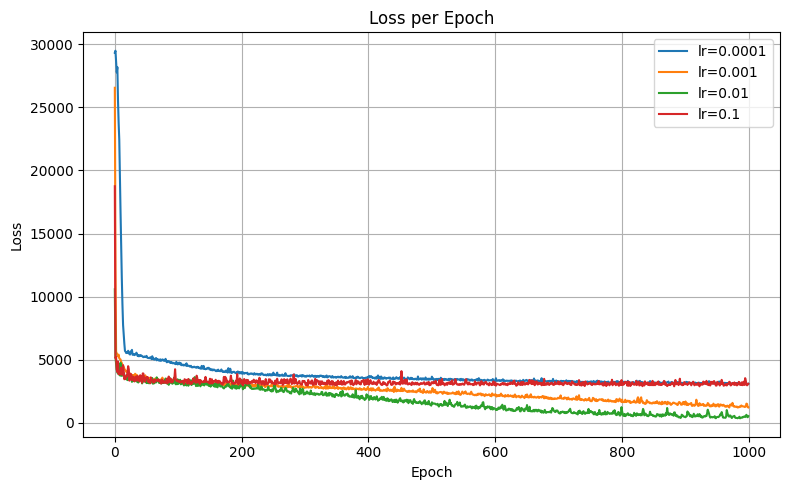

In [ ]:
# plt.figure(figsize=(8, 5))

# for lr in lrs:
#     plt.plot(all_losses[lr], label=f"lr={lr}")

# plt.title("Loss per Epoch")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

It is safe to choose a **learning rate of 0.01**, as it resulted in the lowest curve, and **300 epochs** appear to be sufficient based on this graph.

In [ ]:
learning_rate_reg = 0.01
n_epochs_reg = 300

#### Train Regression Model

Instantiate a regression model

In [ ]:
model5 = RegressionNet(input_size_reg, hidden_size_reg)
optimizer5 = optim.Adam(model5.parameters(), lr=learning_rate_reg)

Train it

In [ ]:
history5 = model5.fit(train_dataloader_reg, optimizer5, n_epochs=n_epochs_reg)

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Loss: 9934.1675
Epoch 10/300, Loss: 3961.6142
Epoch 20/300, Loss: 3670.2603
Epoch 30/300, Loss: 3281.8908
Epoch 40/300, Loss: 3187.5130
Epoch 50/300, Loss: 3186.4467
Epoch 60/300, Loss: 3256.9580
Epoch 70/300, Loss: 3215.4445
Epoch 80/300, Loss: 3159.8997
Epoch 90/300, Loss: 2983.8467
Epoch 100/300, Loss: 3014.0309
Epoch 110/300, Loss: 3157.4054
Epoch 120/300, Loss: 3014.8712
Epoch 130/300, Loss: 2983.9115
Epoch 140/300, Loss: 3259.3043
Epoch 150/300, Loss: 2966.2029
Epoch 160/300, Loss: 2950.9637
Epoch 170/300, Loss: 2932.5393
Epoch 180/300, Loss: 2797.8857
Epoch 190/300, Loss: 3338.5887
Epoch 200/300, Loss: 2759.0039
Epoch 210/300, Loss: 2640.5753
Epoch 220/300, Loss: 2834.6834
Epoch 230/300, Loss: 2737.4983
Epoch 240/300, Loss: 2598.8925
Epoch 250/300, Loss: 2629.2126
Epoch 260/300, Loss: 2561.7017
Epoch 270/300, Loss: 2836.9408
Epoch 280/300, Loss: 2776.5116
Epoch 290/300, Loss: 2442.2394
Epoch 300/300, Loss: 2548.2889


#### Predict

In [ ]:
predicted_values5, true_values5 = model5.predict(test_dataloader_reg)

#### Evaluate

In [ ]:
mse5 = ((predicted_values5 - true_values5) ** 2).mean().item()
mae5 = (predicted_values5 - true_values5).abs().mean().item()

print(f"Model5 Mean Squared Error: {mse5:.4f}")
print(f"Model5 Mean Absolute Error: {mae5:.4f}")

Model5 Mean Squared Error: 3105.8948
Model5 Mean Absolute Error: 44.3674


# **THE END**